<a href="https://colab.research.google.com/github/andrix17/proWine/blob/main/notebook/ProWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProWine Project
## Analisi Descrittiva
Script R per analisi descrittiva delle varietà dei vini usando un dataset di recensioni preso da Kaggle https://www.kaggle.com/zynicide/wine-reviews

In [1]:
install.packages("lsa")
install.packages("tm")
install.packages("RWeka")
install.packages("stopwords")
library(tm)
library(lsa)
library(RWeka)
library(stopwords)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’


Loading required package: NLP

Loading required package: SnowballC


Attaching package: ‘stopwords’


The following object is masked from ‘package:tm’:

    stopwords




In [2]:
download.file('https://raw.githubusercontent.com/andrix17/proWine/main/dataset/winemag-data-130k-v2.csv?token=AMASMT6SWWUQDUY3EEZJWD3AGZUK6','wineData.csv')

In [3]:
wineData <- read.csv('wineData.csv')

In [4]:
head(wineData)

X country 
1 0 Italy   
2 1 Portugal
3 2 US      
4 3 US      
5 4 US      
6 5 Spain   
  description                                                                                                                                                                                                                                                          
1 Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                                         
2 This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                                  
3 Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                                           
4 Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.                                                              
5 Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.            
6 Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.
  designation                        points price province         
1 Vulkà Bianco                       87     NA    Sicily & Sardinia
2 Avidagos                           87     15    Douro            
3                                    87     14    Oregon           
4 Reserve Late Harvest               87     13    Michigan         
5 Vintner's Reserve Wild Child Block 87     65    Oregon           
6 Ars In Vitro                       87     15    Northern Spain   
  region_1            region_2          taster_name       
1 Etna                                  Kerin O’Keefe     
2                                       Roger Voss        
3 Willamette Valley   Willamette Valley Paul Gregutt      
4 Lake Michigan Shore                   Alexander Peartree
5 Willamette Valley   Willamette Valley Paul Gregutt      
6 Navarra                               Michael Schachner 
  taster_twitter_handle
1 @kerinokeefe         
2 @vossroger           
3 @paulgwine           
4                      
5 @paulgwine           
6 @wineschach          
  title                                                                              
1 Nicosia 2013 Vulkà Bianco  (Etna)                                                  
2 Quinta dos Avidagos 2011 Avidagos Red (Douro)                                      
3 Rainstorm 2013 Pinot Gris (Willamette Valley)                                      
4 St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)                
5 Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)
6 Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)                              
  variety            winery             
1 White Blend        Nicosia            
2 Portuguese Red     Quinta dos Avidagos
3 Pinot Gris         Rainstorm          
4 Riesling           St. Julian         
5 Pinot Noir         Sweet Cheeks       
6 Tempranillo-Merlot Tandem

In [5]:
nrow(wineData)

[1] 129971

In [6]:
wineData <- wineData[!duplicated(wineData$description), ]

In [7]:
nrow(wineData)

[1] 119955

In [8]:
variety = wineData$variety
wines = wineData$winery
reviews = wineData$description
head(sort(table(variety), decreasing = T),30)

variety
                Pinot Noir                 Chardonnay 
                     12277                      10867 
        Cabernet Sauvignon                  Red Blend 
                      8837                       8239 
  Bordeaux-style Red Blend                   Riesling 
                      6469                       4773 
           Sauvignon Blanc                      Syrah 
                      4574                       3826 
                      Rosé                     Merlot 
                      3220                       2895 
                  Nebbiolo                  Zinfandel 
                      2602                       2530 
                Sangiovese                     Malbec 
                      2460                       2446 
            Portuguese Red                White Blend 
                      2282                       2179 
           Sparkling Blend                Tempranillo 
                      1971                       1671 
  

In [9]:
corpus <- Corpus(VectorSource(reviews))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                      
[3] Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                               
[4] Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled gua

In [11]:
corpus <- tm_map(corpus, tolower)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone and dried herb. the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] this is ripe and fruity, a wine that is smooth while still structured. firm tannins are filled out with juicy red berry fruits and freshened with acidity. it's  already drinkable, although it will certainly be better from 2016.                      
[3] tart and snappy, the flavors of lime flesh and rind dominate. some green pineapple pokes through, with crisp acidity underscoring the flavors. the wine was all stainless-steel fermented.                                                               
[4] pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled gua

In [12]:
stopwordlist <- stopwords::stopwords("en", source= "nltk")#Snowball, marimo, nltk, stopwords-iso, smart
corpus <- tm_map(corpus, removeWords, stopwordlist)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwordlist):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone  dried herb.  palate  overly expressive, offering unripened apple, citrus  dried sage alongside brisk acidity.                                                   
[2]   ripe  fruity,  wine   smooth  still structured. firm tannins  filled   juicy red berry fruits  freshened  acidity.   already drinkable, although   certainly  better  2016.                                    
[3] tart  snappy,  flavors  lime flesh  rind dominate.  green pineapple pokes ,  crisp acidity underscoring  flavors.  wine   stainless-steel fermented.                                                             
[4] pineapple rind, lemon pith  orange blossom start   aromas.  palate   bit  opulent,  notes  honey-drizzled guava  mango giving way   slightly astringent, semidry finish.                                         
[5] much like  regular bottling  2012,  come

In [13]:
corpus <- tm_map(corpus, removePunctuation)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit broom brimstone  dried herb  palate  overly expressive offering unripened apple citrus  dried sage alongside brisk acidity                                                 
[2]   ripe  fruity  wine   smooth  still structured firm tannins  filled   juicy red berry fruits  freshened  acidity   already drinkable although   certainly  better  2016                                 
[3] tart  snappy  flavors  lime flesh  rind dominate  green pineapple pokes   crisp acidity underscoring  flavors  wine   stainlesssteel fermented                                                           
[4] pineapple rind lemon pith  orange blossom start   aromas  palate   bit  opulent  notes  honeydrizzled guava  mango giving way   slightly astringent semidry finish                                       
[5] much like  regular bottling  2012  comes across  rather rough  tannic  r

In [14]:
tdmc <- TermDocumentMatrix(corpus)

In [15]:
tdmc

<<TermDocumentMatrix (terms: 43754, documents: 119955)>>
Non-/sparse entries: 2885845/5245625225
Sparsity           : 100%
Maximal term length: 47
Weighting          : term frequency (tf)

In [16]:
3125556/(5683625578+3125556)*100 #percentuale di elementi non nulli

[1] 0.05496207

In [17]:
tdmTemp <- removeSparseTerms(tdmc, 0.995)
tdmTemp

<<TermDocumentMatrix (terms: 759, documents: 119955)>>
Non-/sparse entries: 2153310/88892535
Sparsity           : 98%
Maximal term length: 15
Weighting          : term frequency (tf)

In [18]:
words <- rownames(tdmTemp)
words

[1] "acidity"         "alongside"       "apple"           "aromas"         
  [5] "brisk"           "citrus"          "dried"           "fruit"          
  [9] "herb"            "include"         "offering"        "palate"         
 [13] "sage"            "tropical"        "2016"            "already"        
 [17] "although"        "berry"           "better"          "certainly"      
 [21] "drinkable"       "firm"            "fruits"          "fruity"         
 [25] "juicy"           "red"             "ripe"            "smooth"         
 [29] "still"           "structured"      "tannins"         "wine"           
 [33] "crisp"           "dominate"        "fermented"       "flavors"        
 [37] "green"           "lime"            "pineapple"       "rind"           
 [41] "tart"            "astringent"      "bit"             "blossom"        
 [45] "finish"          "giving"          "lemon"           "mango"          
 [49] "notes"           "opulent"         "orange"          "pith"           
 [53] "slightly"        "start"           "way"             "across"         
 [57] "bottling"        "comes"           "earthy"          "good"           
 [61] "hearty"          "herbal"          "like"            "much"           
 [65] "rather"          "rough"           "rustic"          "tannic"         
 [69] "blackberry"      "bodied"          "dark"            "fairly"         
 [73] "fresh"           "full"            "herbs"           "mouth"          
 [77] "plum"            "raspberry"       "show"            "spicy"          
 [81] "typical"         "whiff"           "balanced"        "bright"         
 [85] "candied"         "carry"           "opens"           "pepper"         
 [89] "savory"          "soft"            "white"           "dry"            
 [93] "food"            "offers"          "restrained"      "spice"          
 [97] "texture"         "accent"          "elegant"         "peach"          
[101] "thyme"           "depth"           "drink"           "flavor"         
[105] "great"           "pear"            "touch"           "attractive"     
[109] "cabernet"        "chocolate"       "coffee"          "end"            
[113] "finishing"       "merlot"          "oaky"            "strong"         
[117] "structure"       "supple"          "aftertaste"      "almost"         
[121] "character"       "layered"         "mineral"         "strongly"       
[125] "taut"            "tight"           "well"            "accented"       
[129] "backbone"        "black"           "chalky"          "cherry"         
[133] "oak"             "otherwise"       "rich"            "throughout"     
[137] "whole"           "bean"            "coconut"         "dominated"      
[141] "drying"          "espresso"        "give"            "roasted"        
[145] "together"        "vanilla"         "approachable"    "aroma"          
[149] "california"      "classic"         "cut"             "everyday"       
[153] "range"           "six"             "style"           "toward"         
[157] "winery"          "years"           "appeal"          "easy"           
[161] "lean"            "racy"            "refreshing"      "riesling"       
[165] "yet"             "zesty"           "accents"         "baked"          
[169] "balance"         "balsamic"        "compact"         "features"       
[173] "peppery"         "redberry"        "set"             "tobacco"        
[177] "weight"          "feel"            "finishes"        "hot"            
[181] "meaty"           "profile"         "raw"             "simple"         
[185] "time"            "charred"         "clove"           "fullbodied"     
[189] "leather"         "mint"            "nose"            "top"            
[193] "wood"            "back"            "blend"           "crushed"        
[197] "franc"           "menthol"         "ready"           "sauvignon"      
[201] "ample"           "berries"         "currant"         "dusty"          
[205] "toasted"         

In [19]:
tdm <-as.matrix(tdmTemp)

In [20]:
tdmPesata <-lw_logtf(tdm) * ( 1 - entropy( tdm ) )

In [21]:
lsar <- lsa(tdmPesata)

In [22]:
length(lsar$sk)

[1] 302

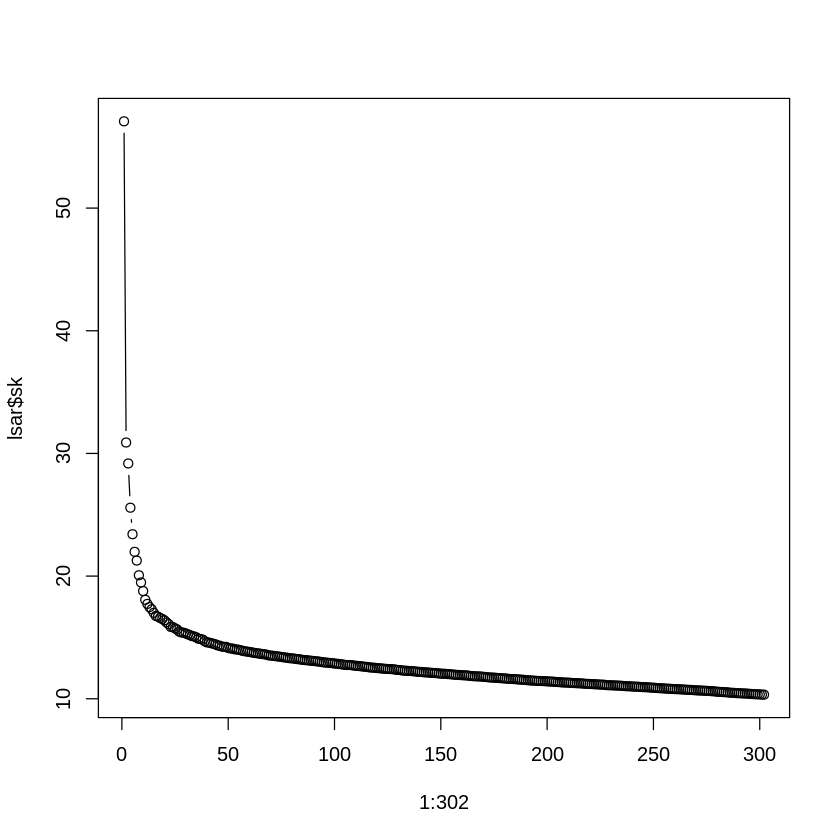

In [23]:
plot(1:302, lsar$sk, type="b")

In [24]:
tls <- lsar$tk %*% diag(lsar$sk)
dls <- lsar$dk %*% diag(lsar$sk)

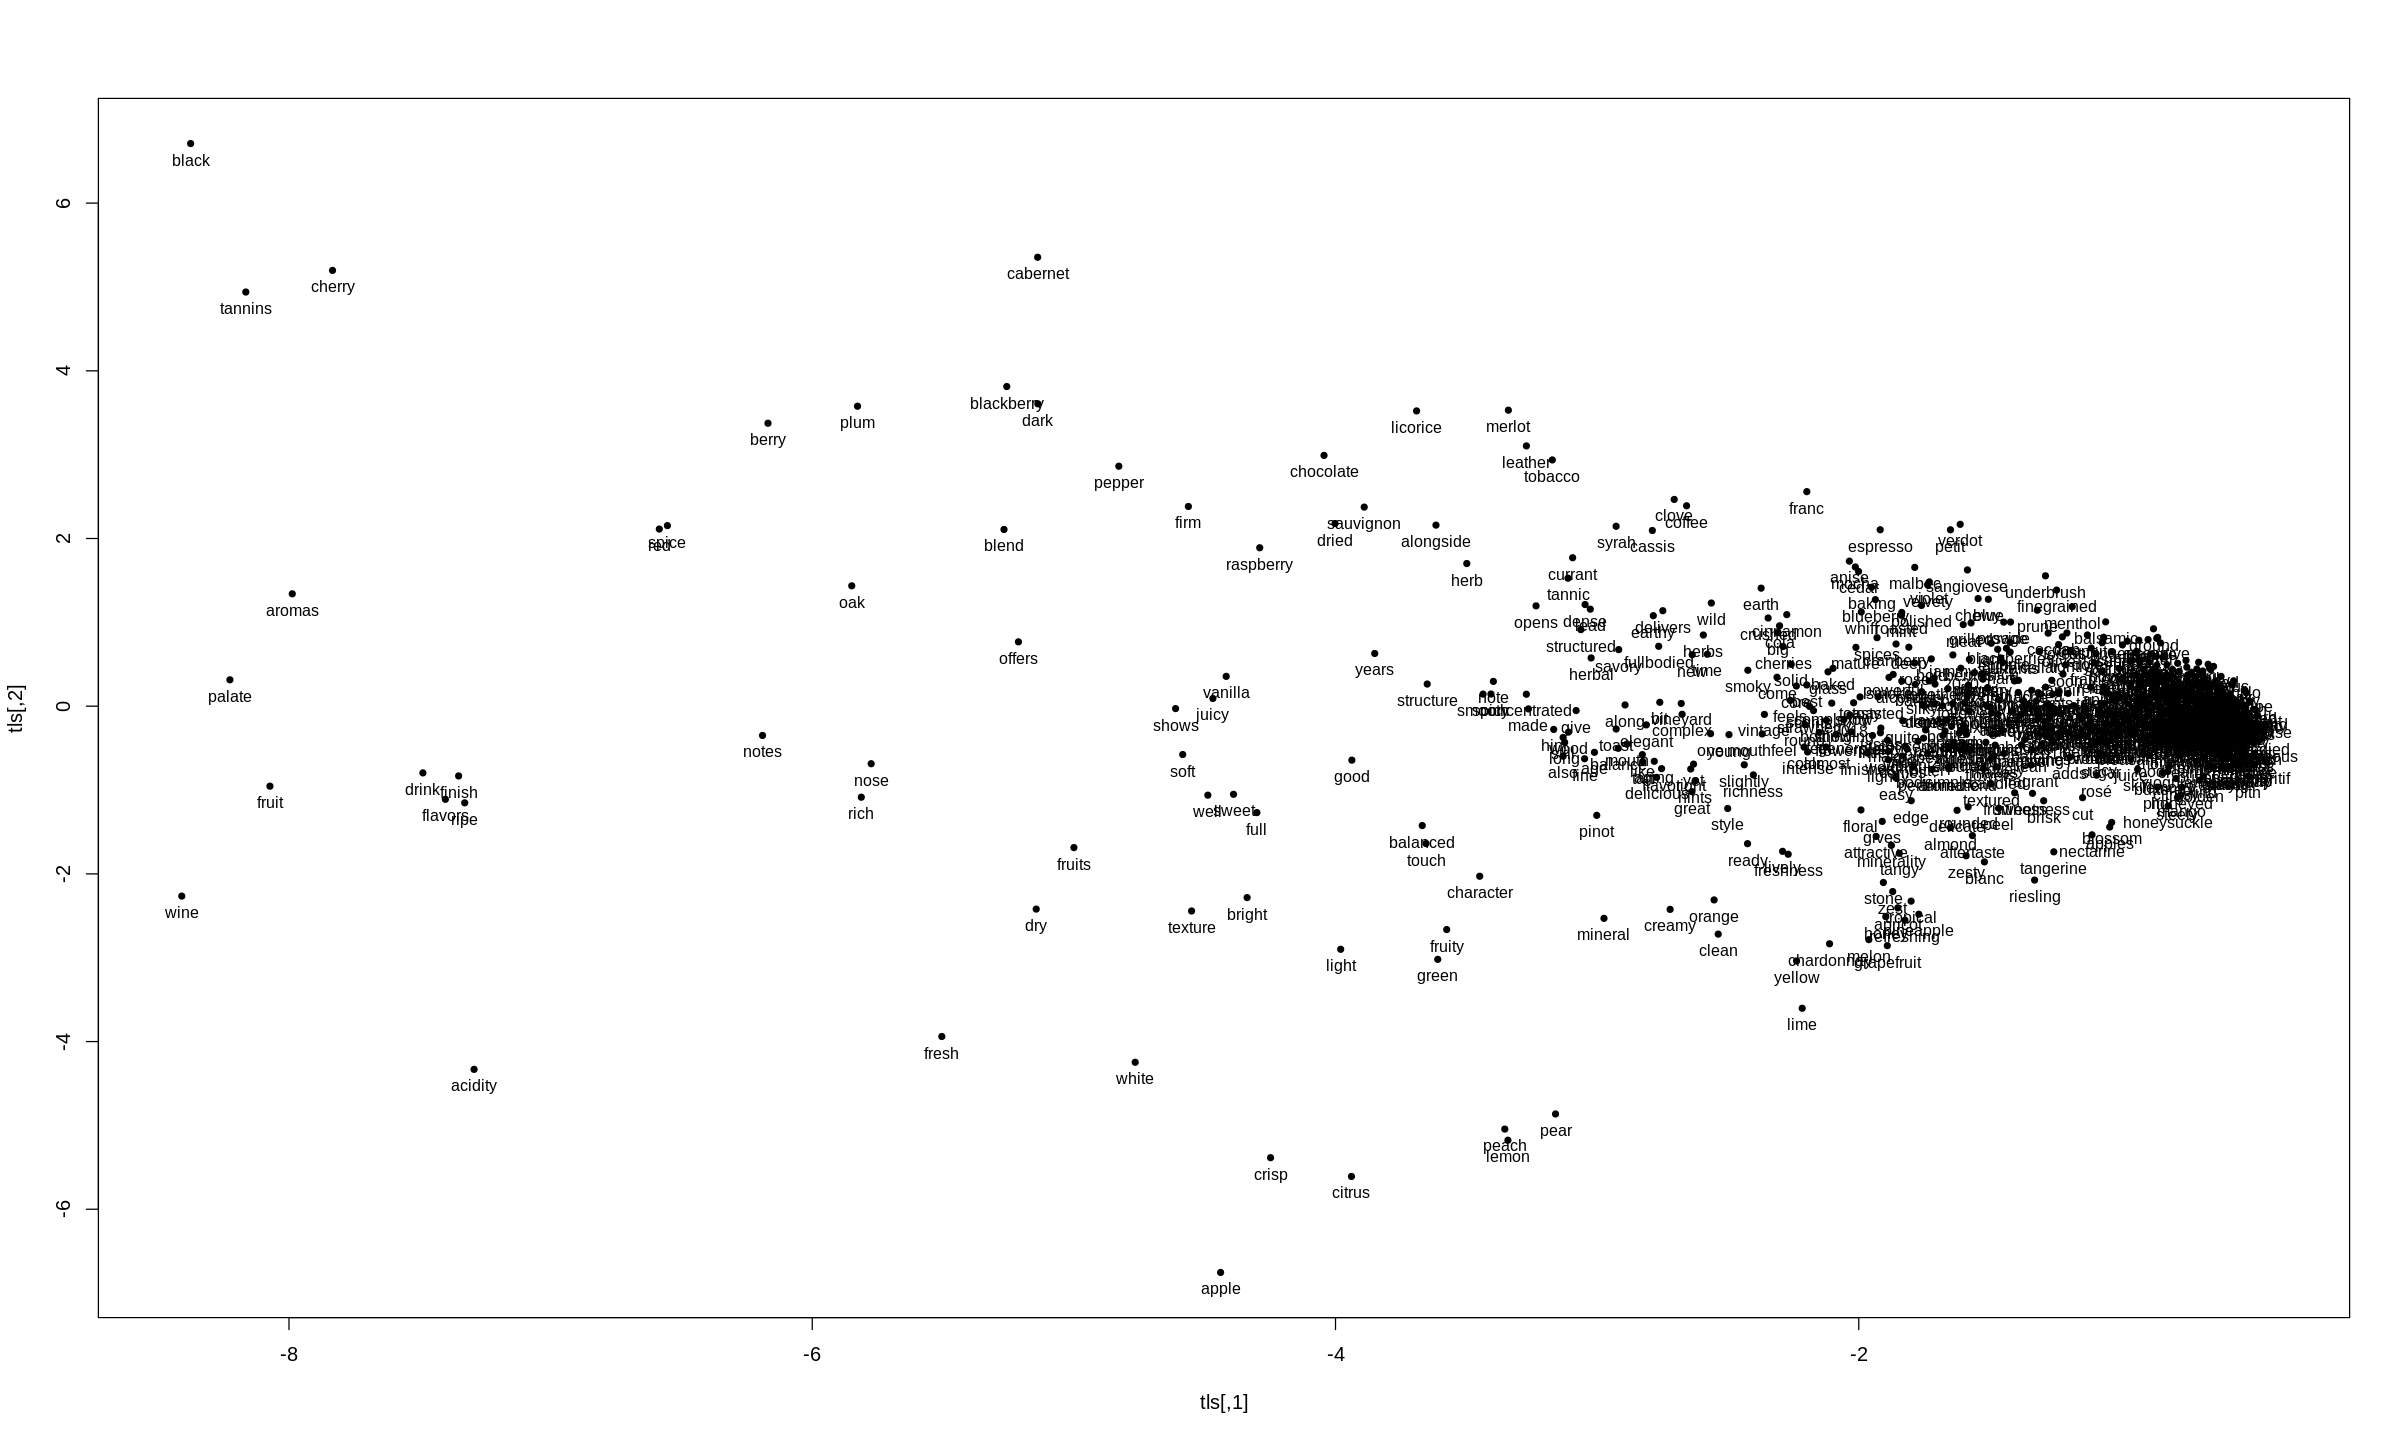

In [25]:
options(repr.plot.width=20, repr.plot.height=12)
plot(tls, pch=20)
text(tls,labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

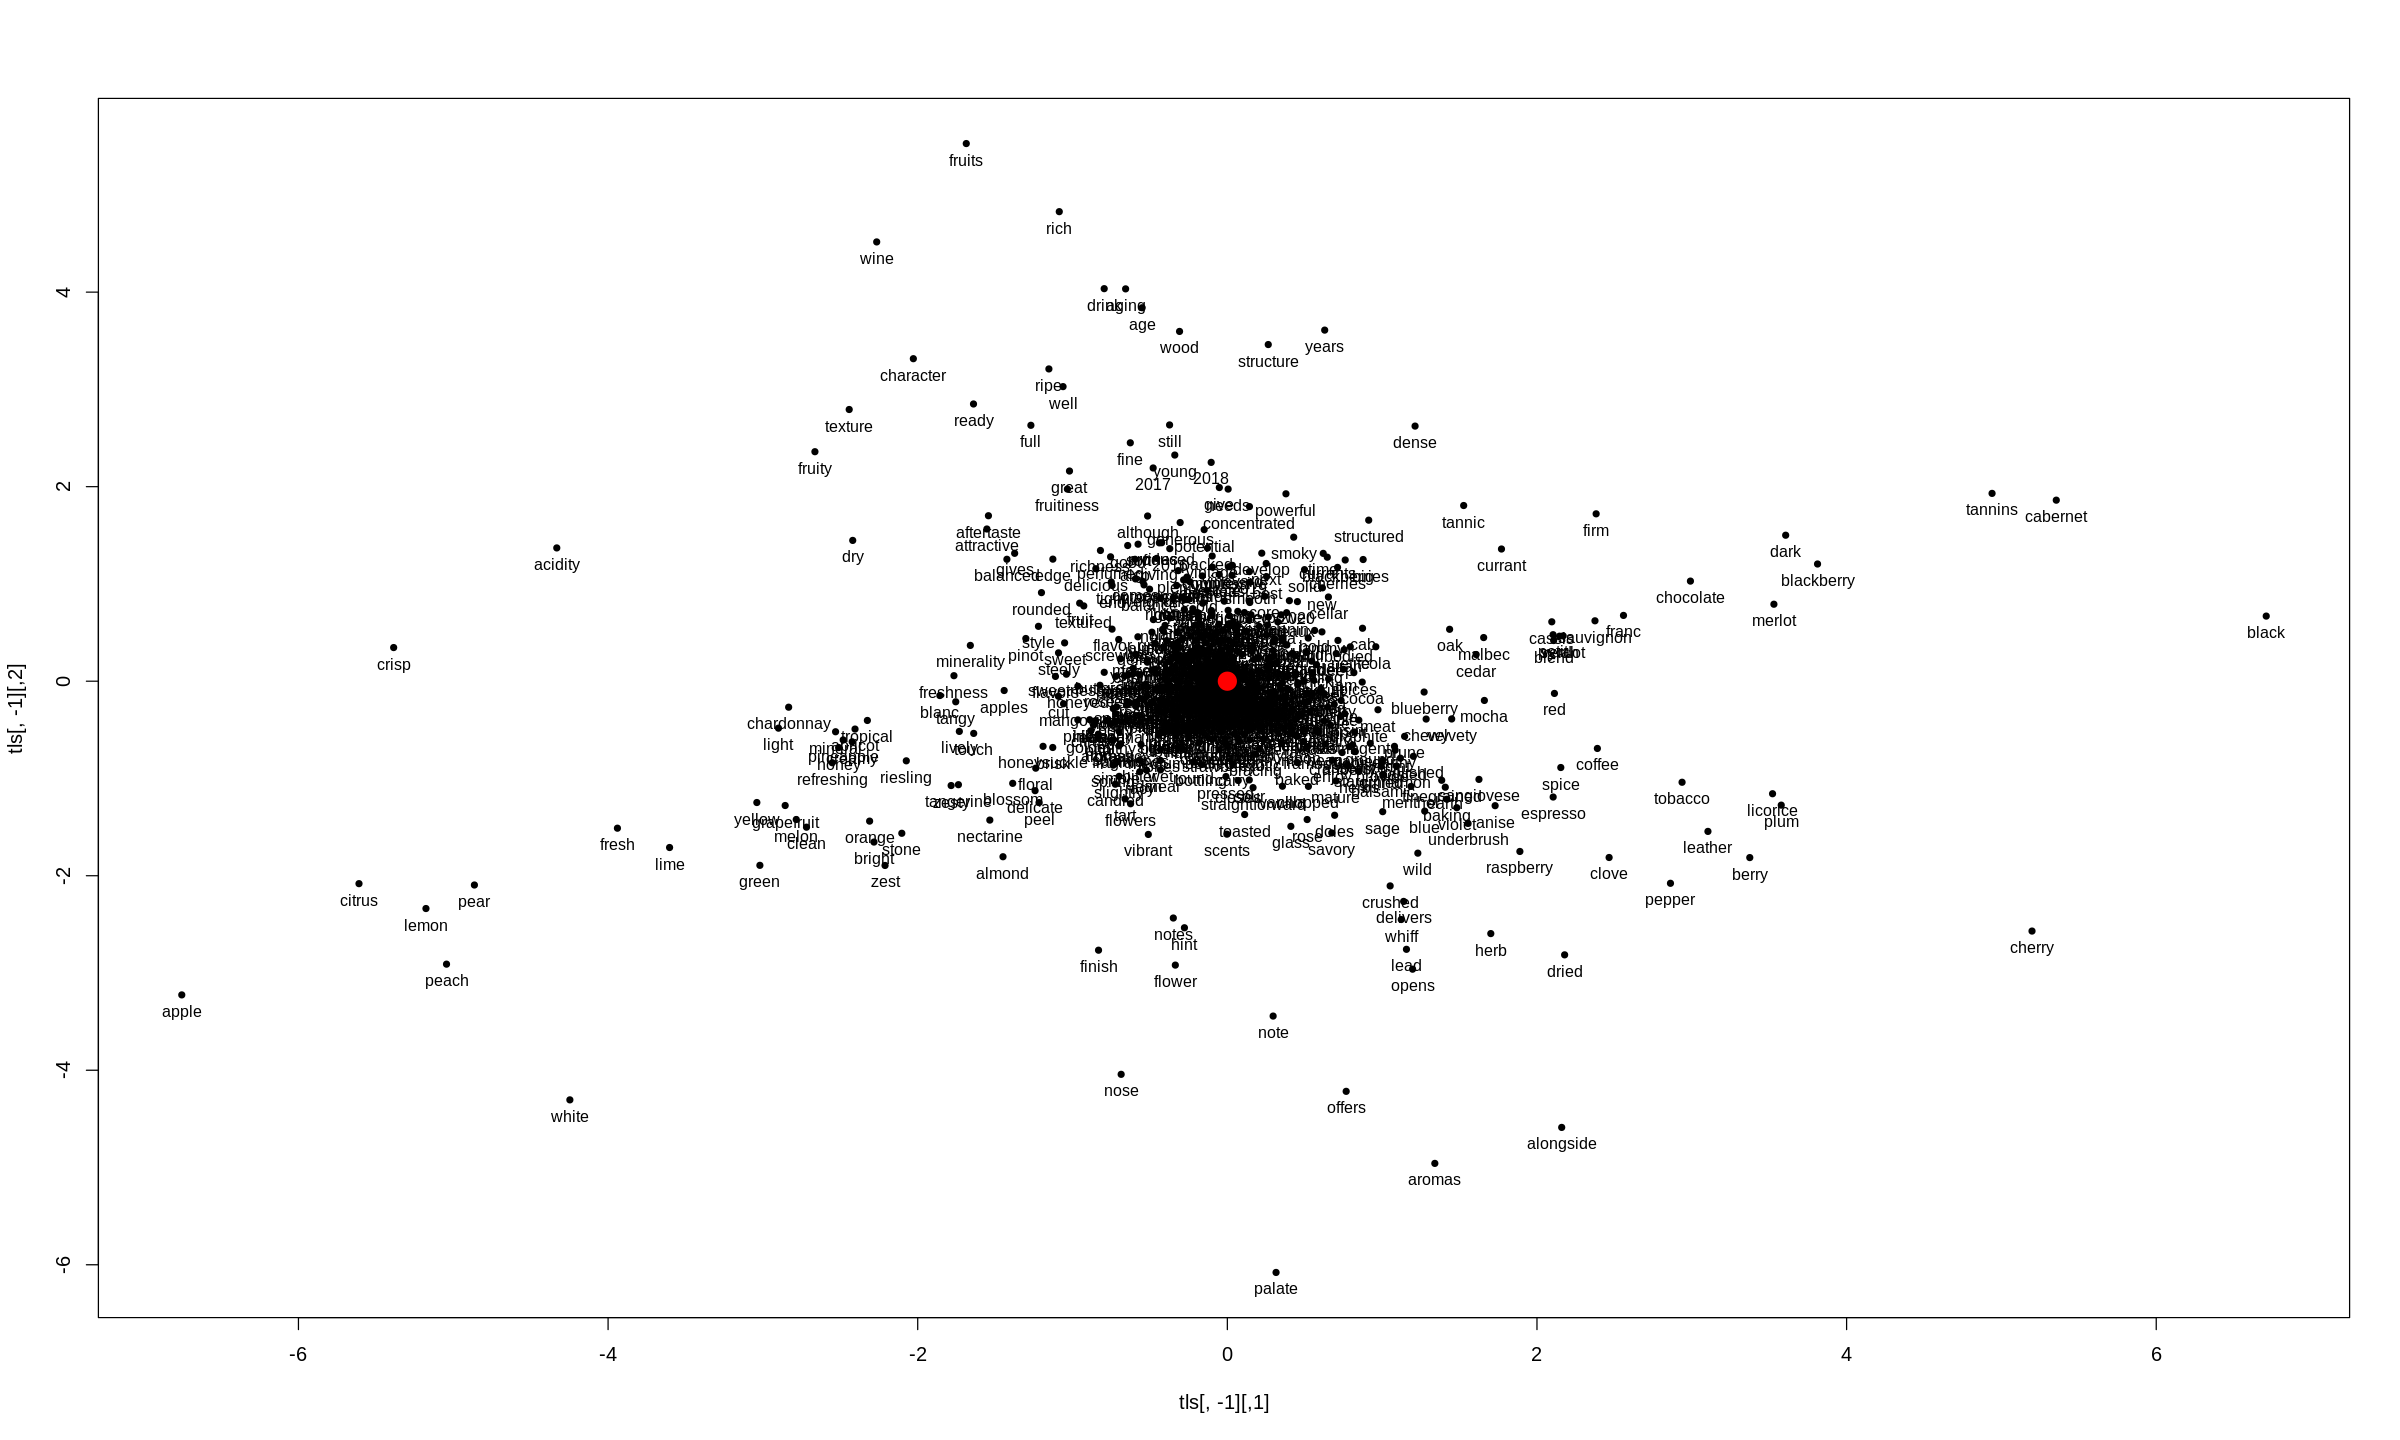

In [40]:
plot(tls[,-1], pch=20)
text(tls[,-1],labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

In [26]:
norm_vec <- function(x) sqrt(sum(x^2))
norma_termini_lsa <- apply(tls, 1, norm_vec)

In [27]:
nrow(tls)

[1] 759

In [48]:
tls_ridotto <- subset(tls, norma_termini_lsa > 5)
words_ridotto <- subset(words, norma_termini_lsa > 5)

In [49]:
nrow(tls_ridotto)

[1] 388

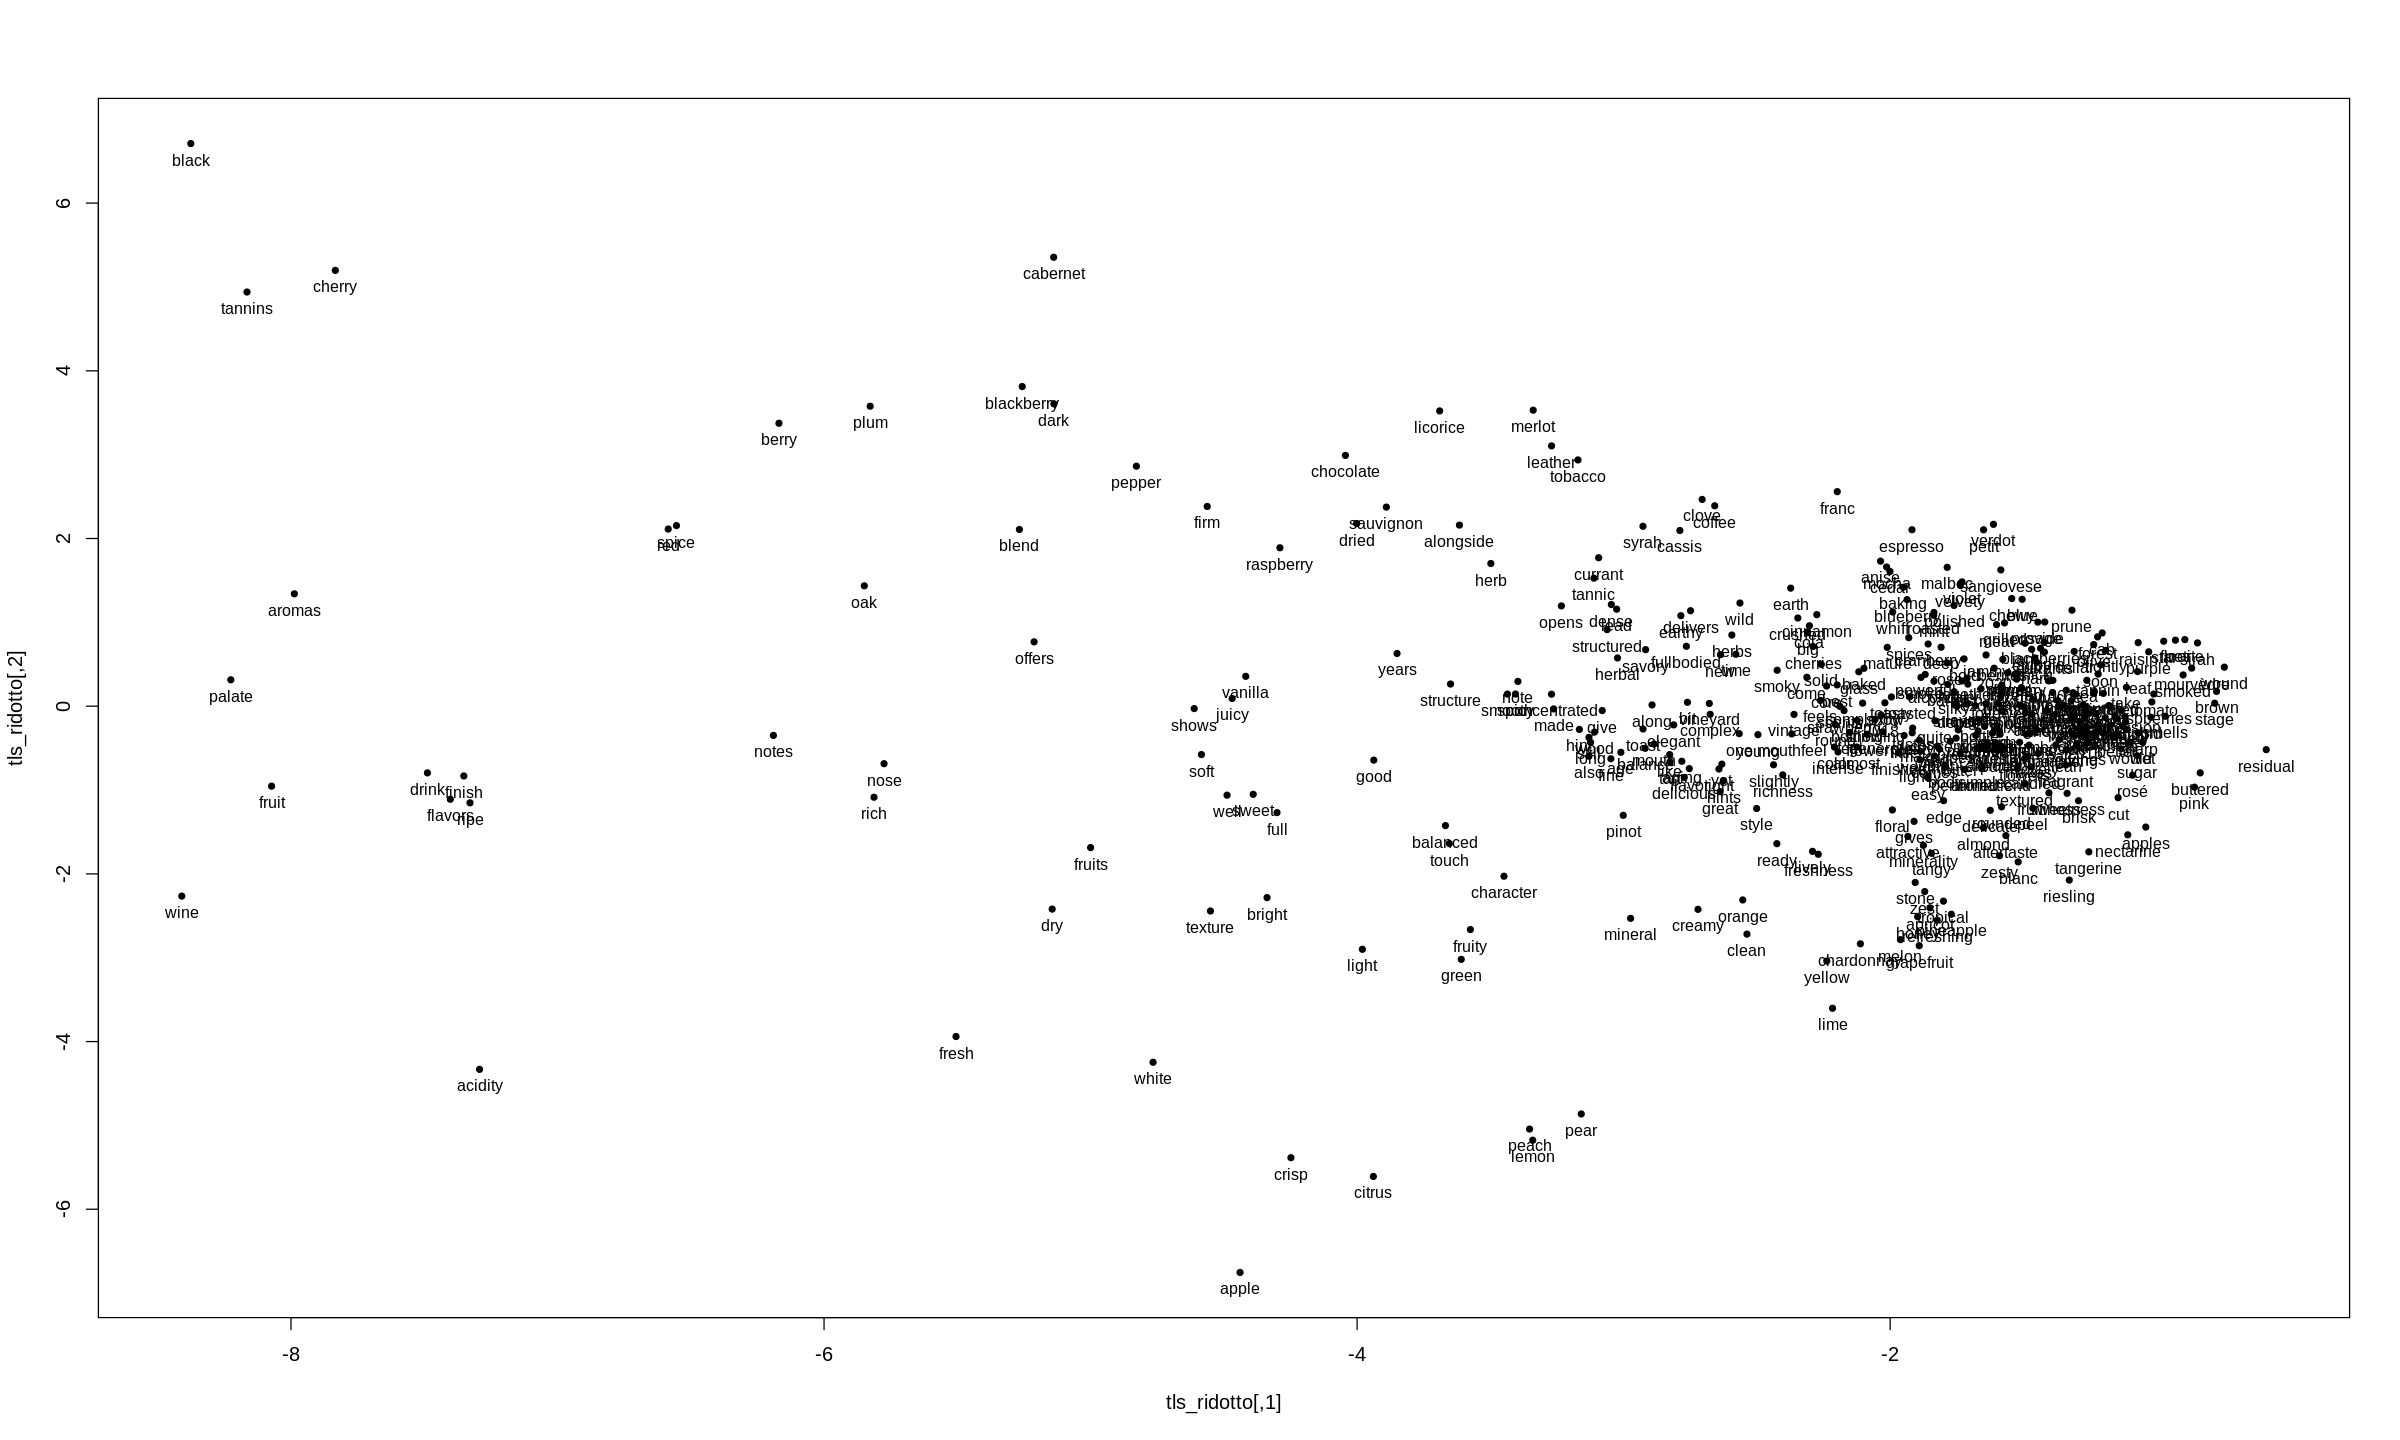

In [50]:
options(repr.plot.width=20, repr.plot.height=12)
plot(tls_ridotto, pch=20)
text(tls_ridotto,labels=words_ridotto, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

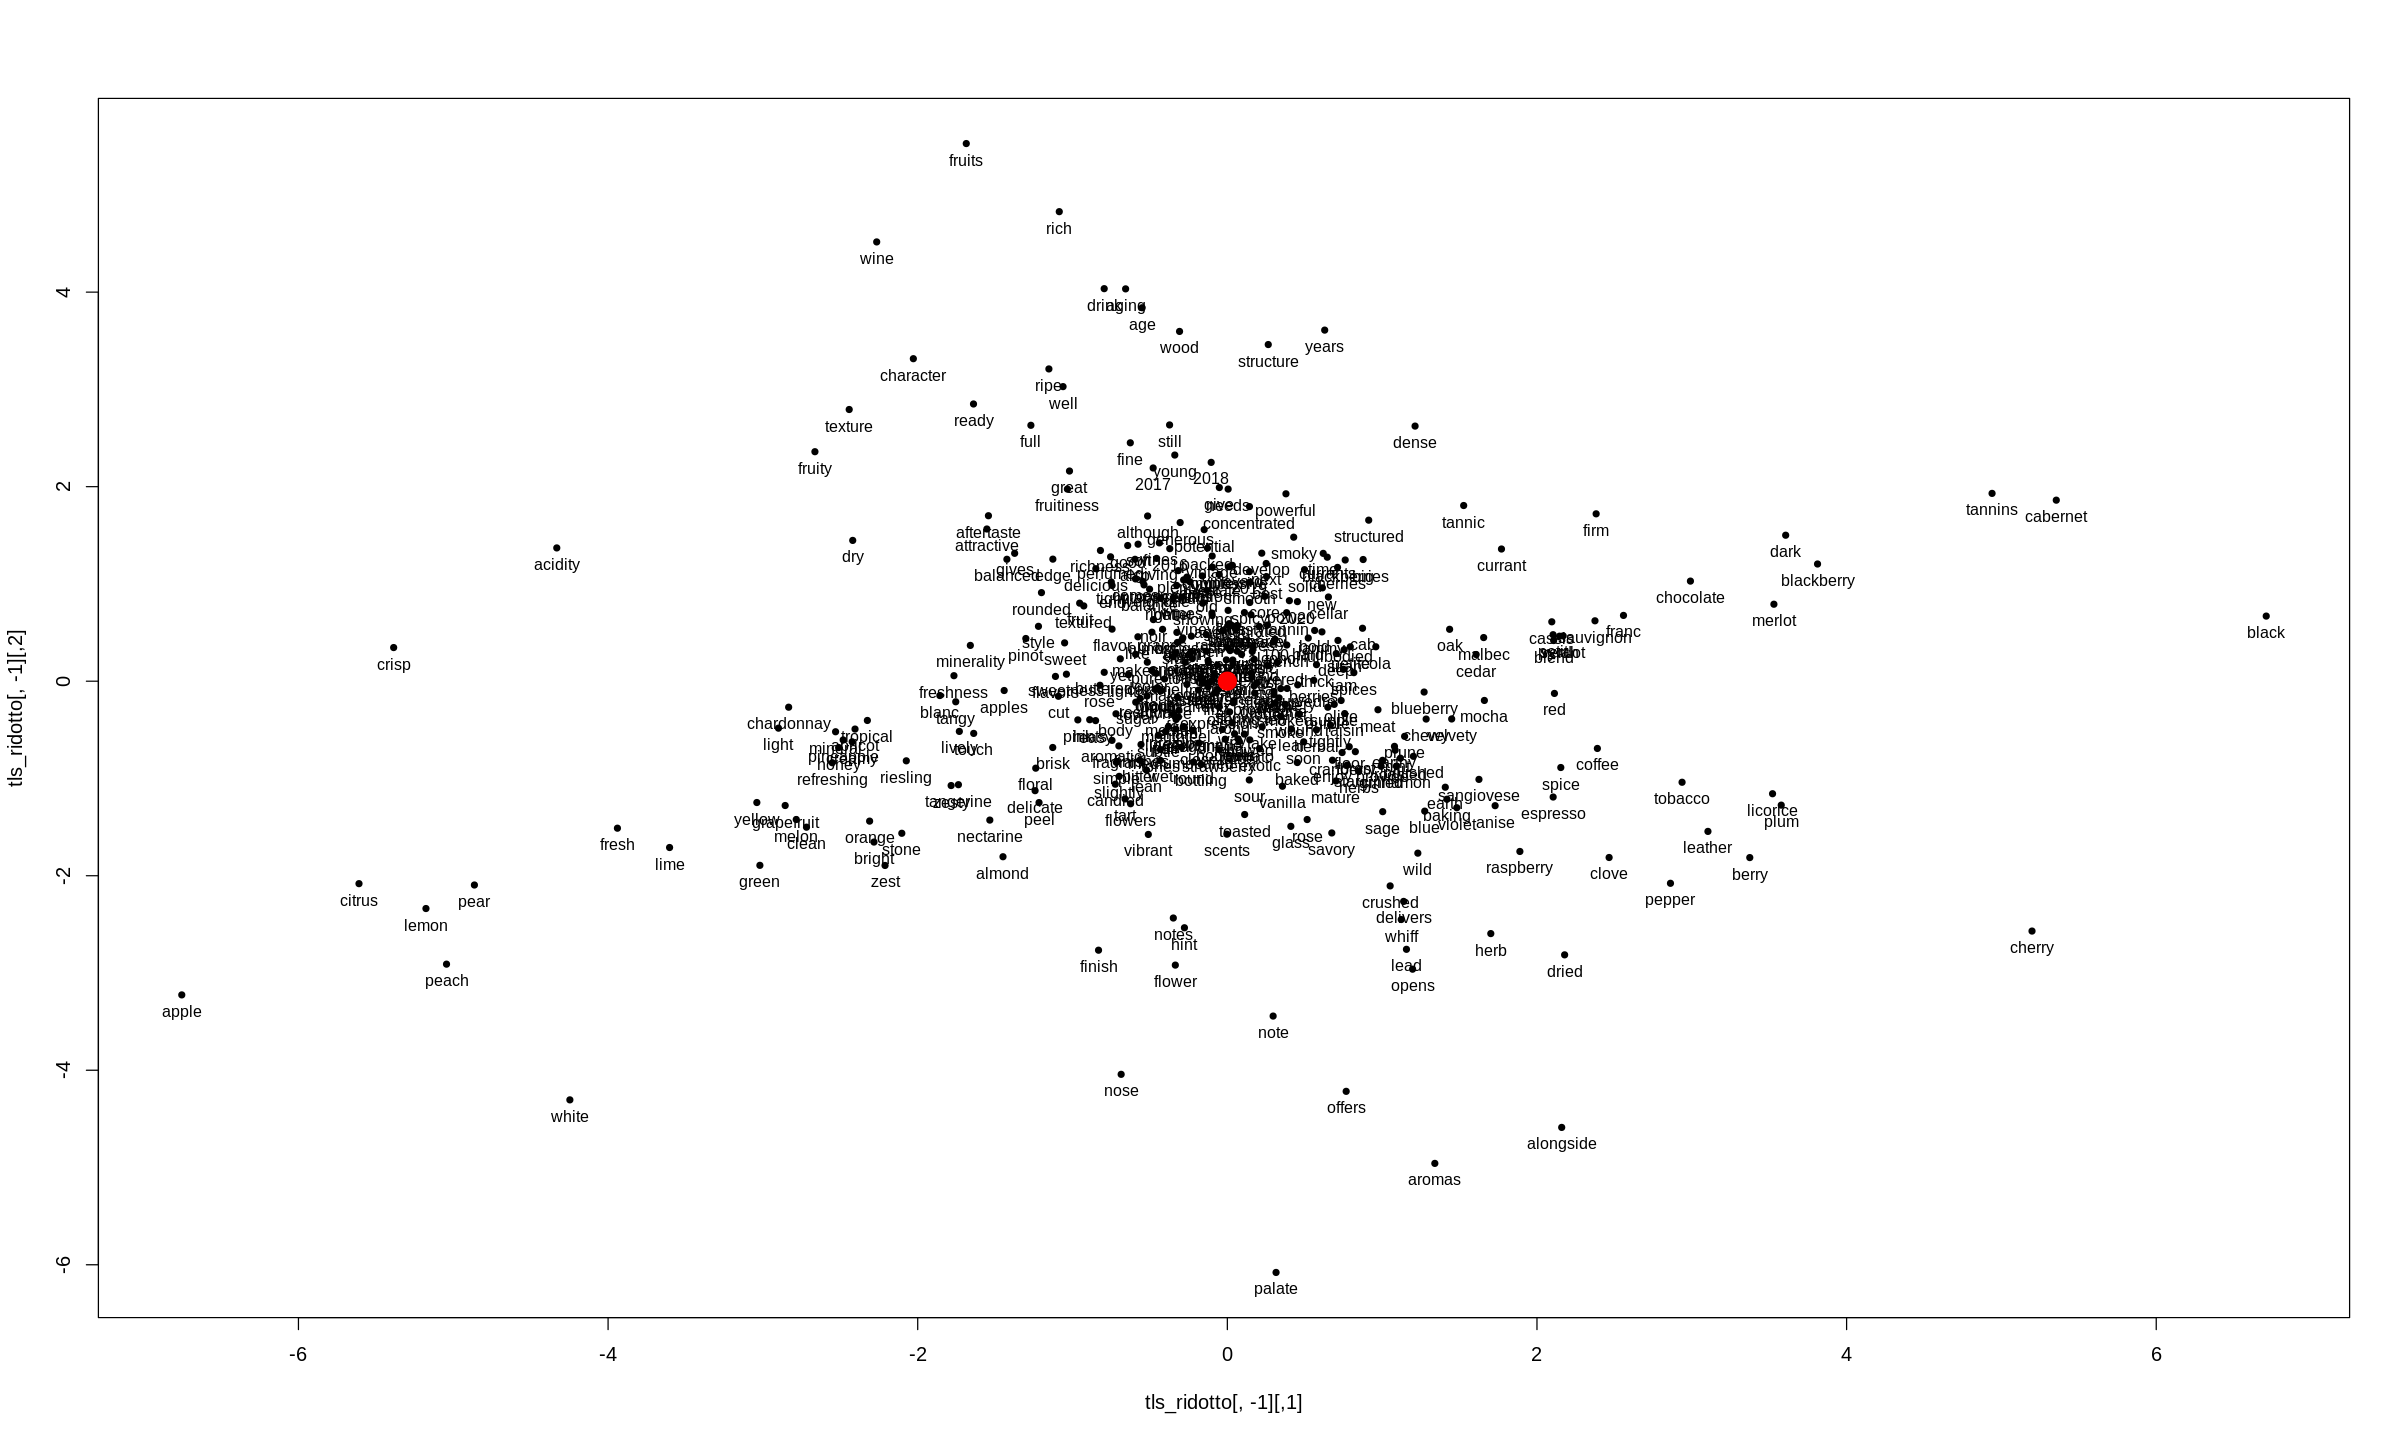

In [51]:
plot(tls_ridotto[,-1], pch=20)
text(tls_ridotto[,-1],labels=words_ridotto, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

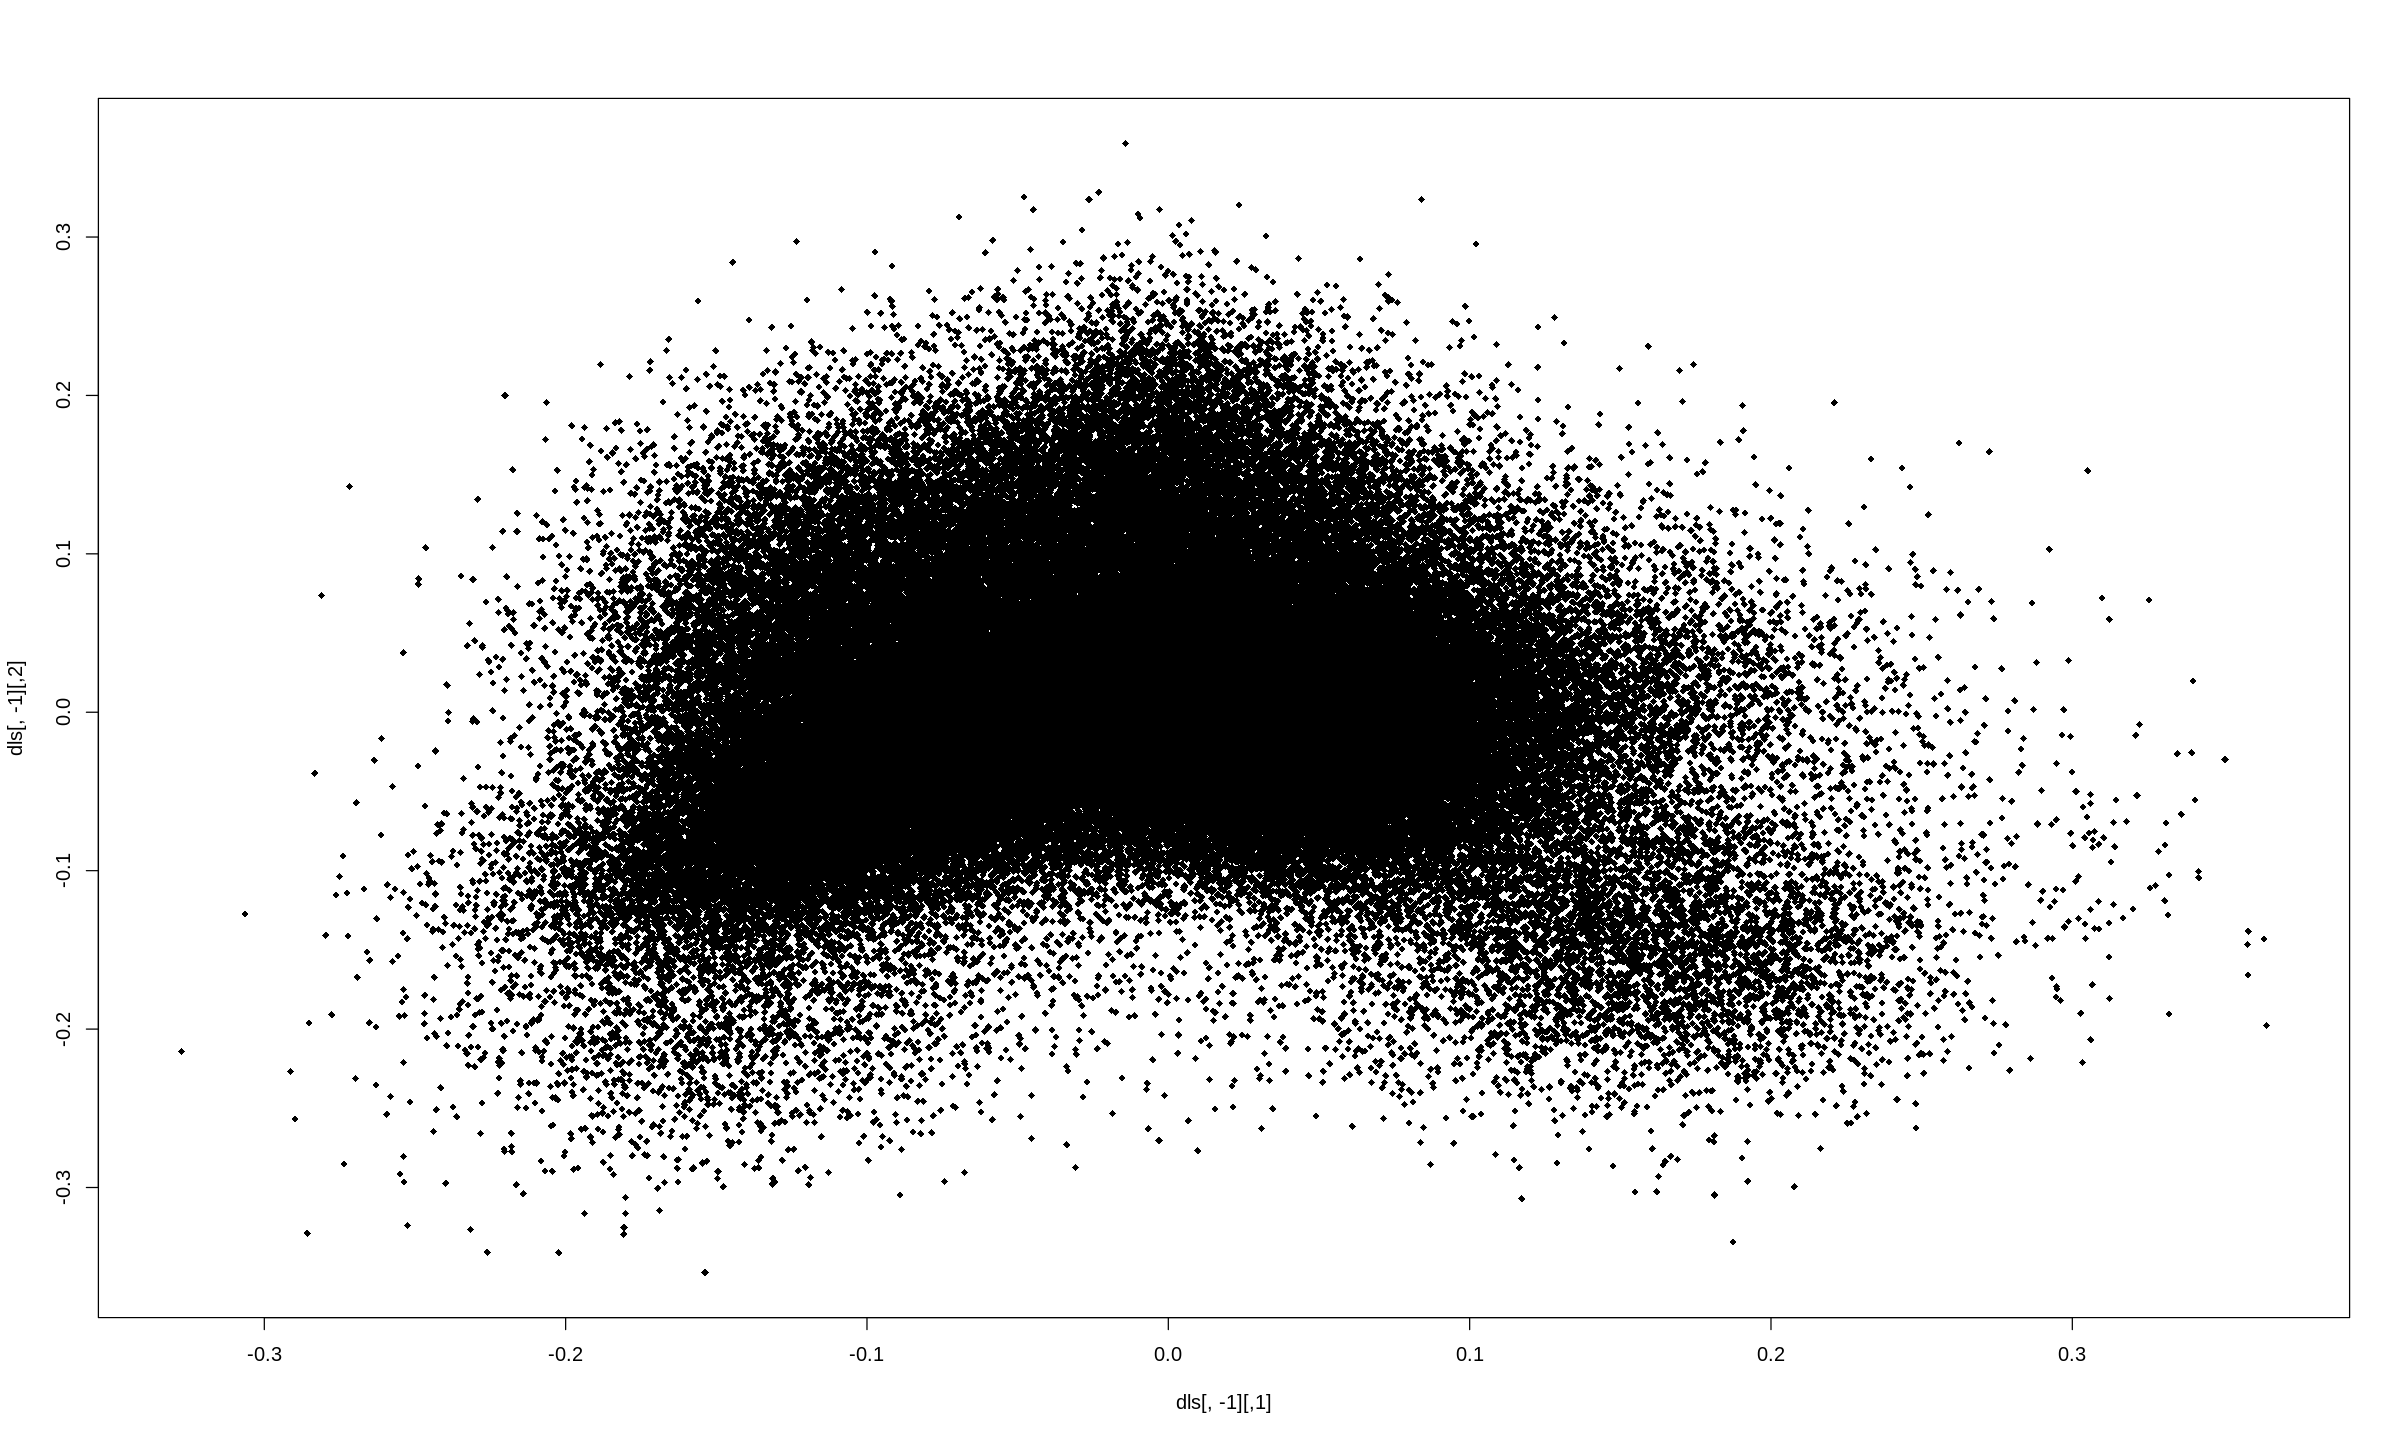

In [52]:
plot( dls[,-1], pch=18, cex=0.8 )

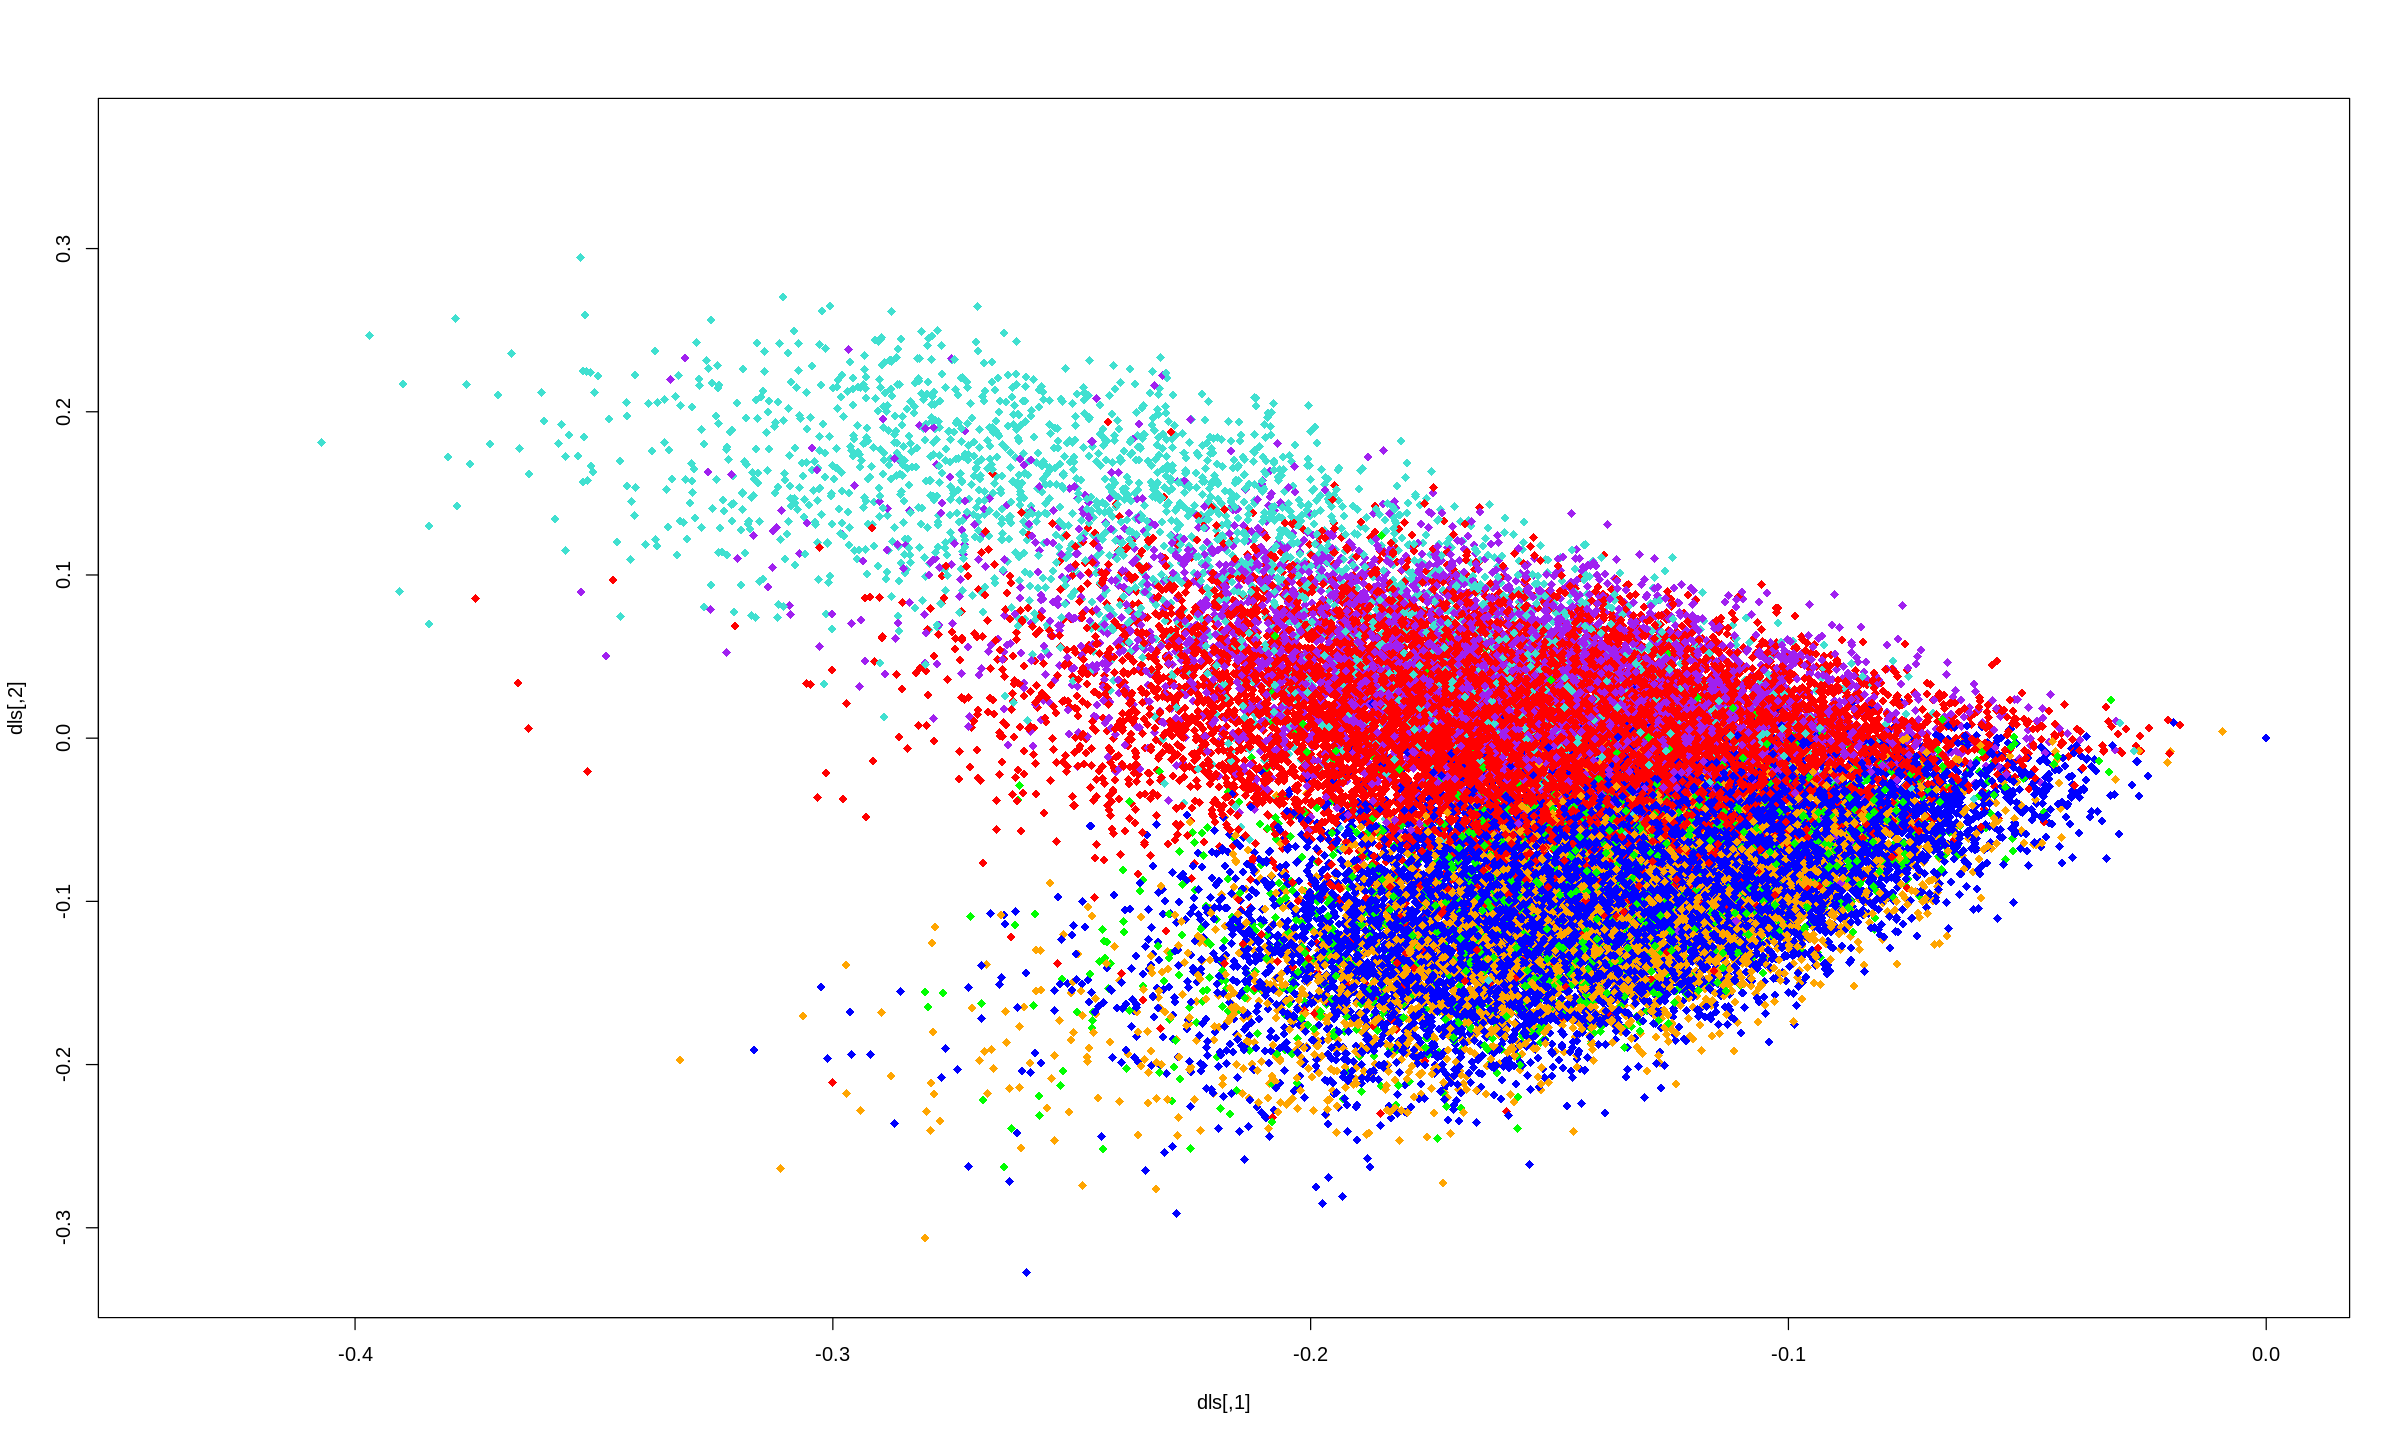

In [53]:
varietycolor <- function(x) switch(x, "Pinot Noir" = "red",
                                      "Chardonnay"="blue", 
                                      "Cabernet Sauvignon"=rgb(0,0,0,alpha = 0), 
                                      "Syrah"="purple", "Shiraz"="purple", 
                                      "Zinfandel"=rgb(0,0,0,alpha = 0),
                                      "Riesling" = "orange",
                                      "Nebbiolo"="turquoise",
                                      "Sangiovese"=rgb(0,0,0,alpha = 0),
                                      "Sparkling Blend"="green", 
                                      "Champagne Blend"=rgb(0,0,0,alpha = 0),
                                      "Rosé"=rgb(0,0,0,alpha = 0), 
                                      rgb(0,0,0,alpha = 0))
damcols <- sapply(variety, varietycolor)
plot( dls, pch=18, cex=1, col=damcols )

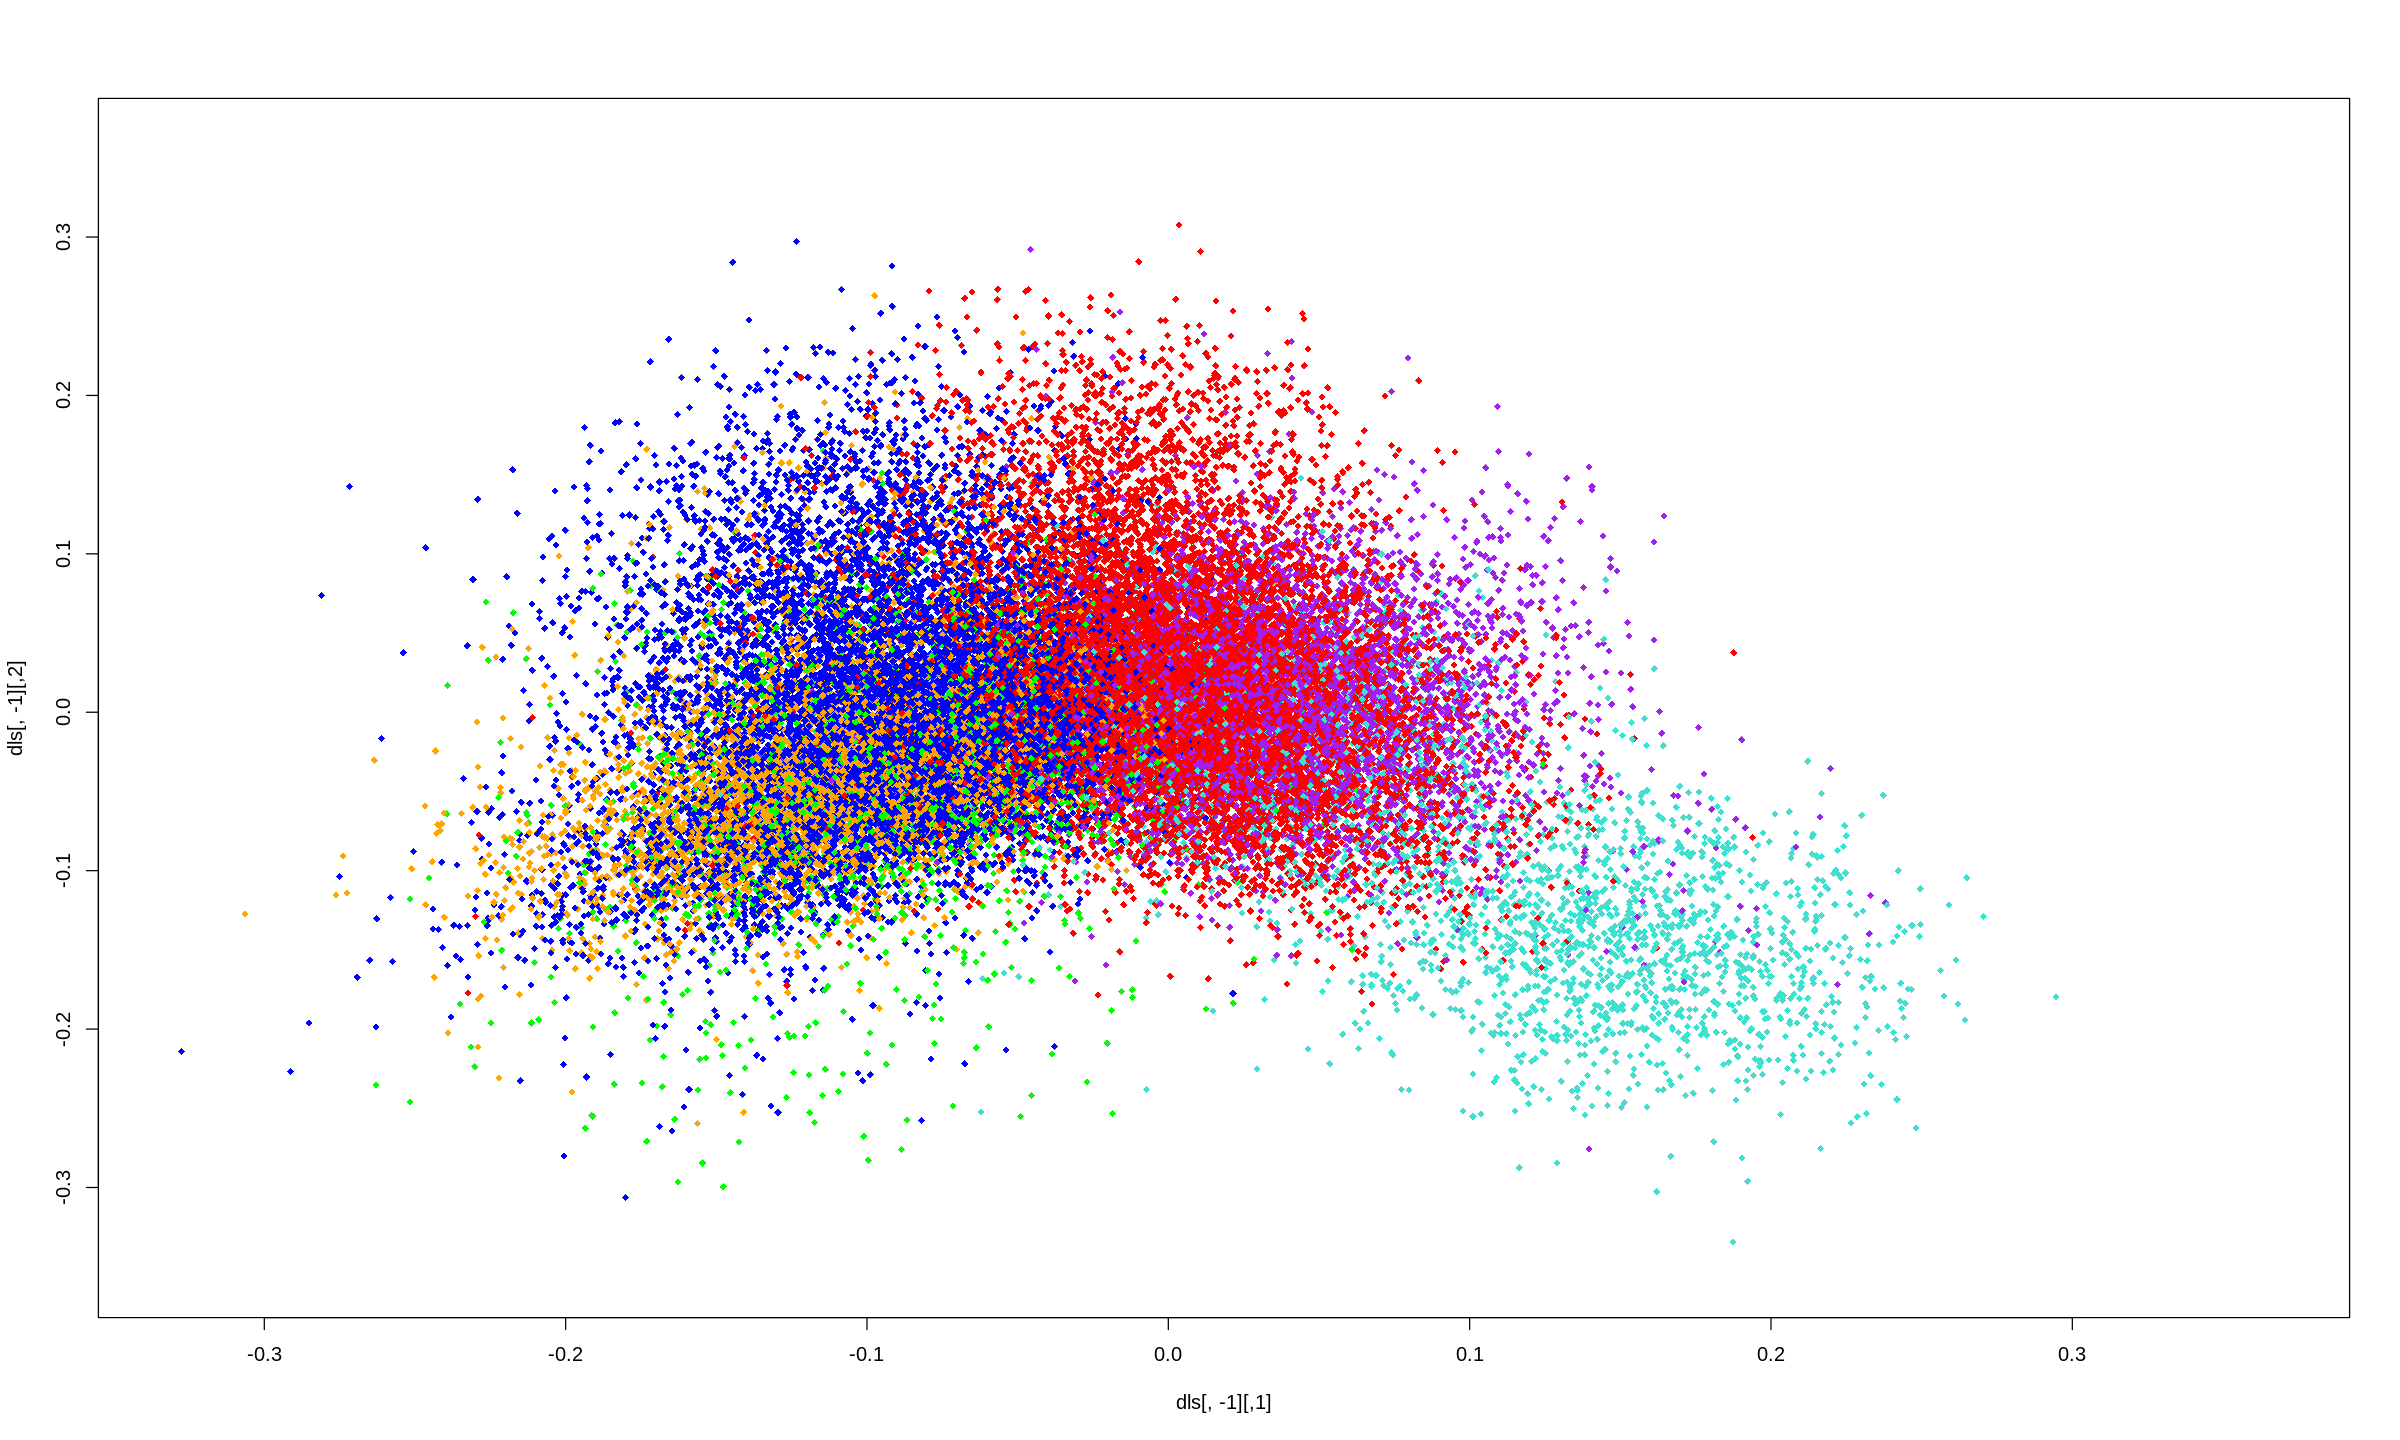

In [45]:
plot( dls[,-1], pch=18, cex=0.8, col=damcols )

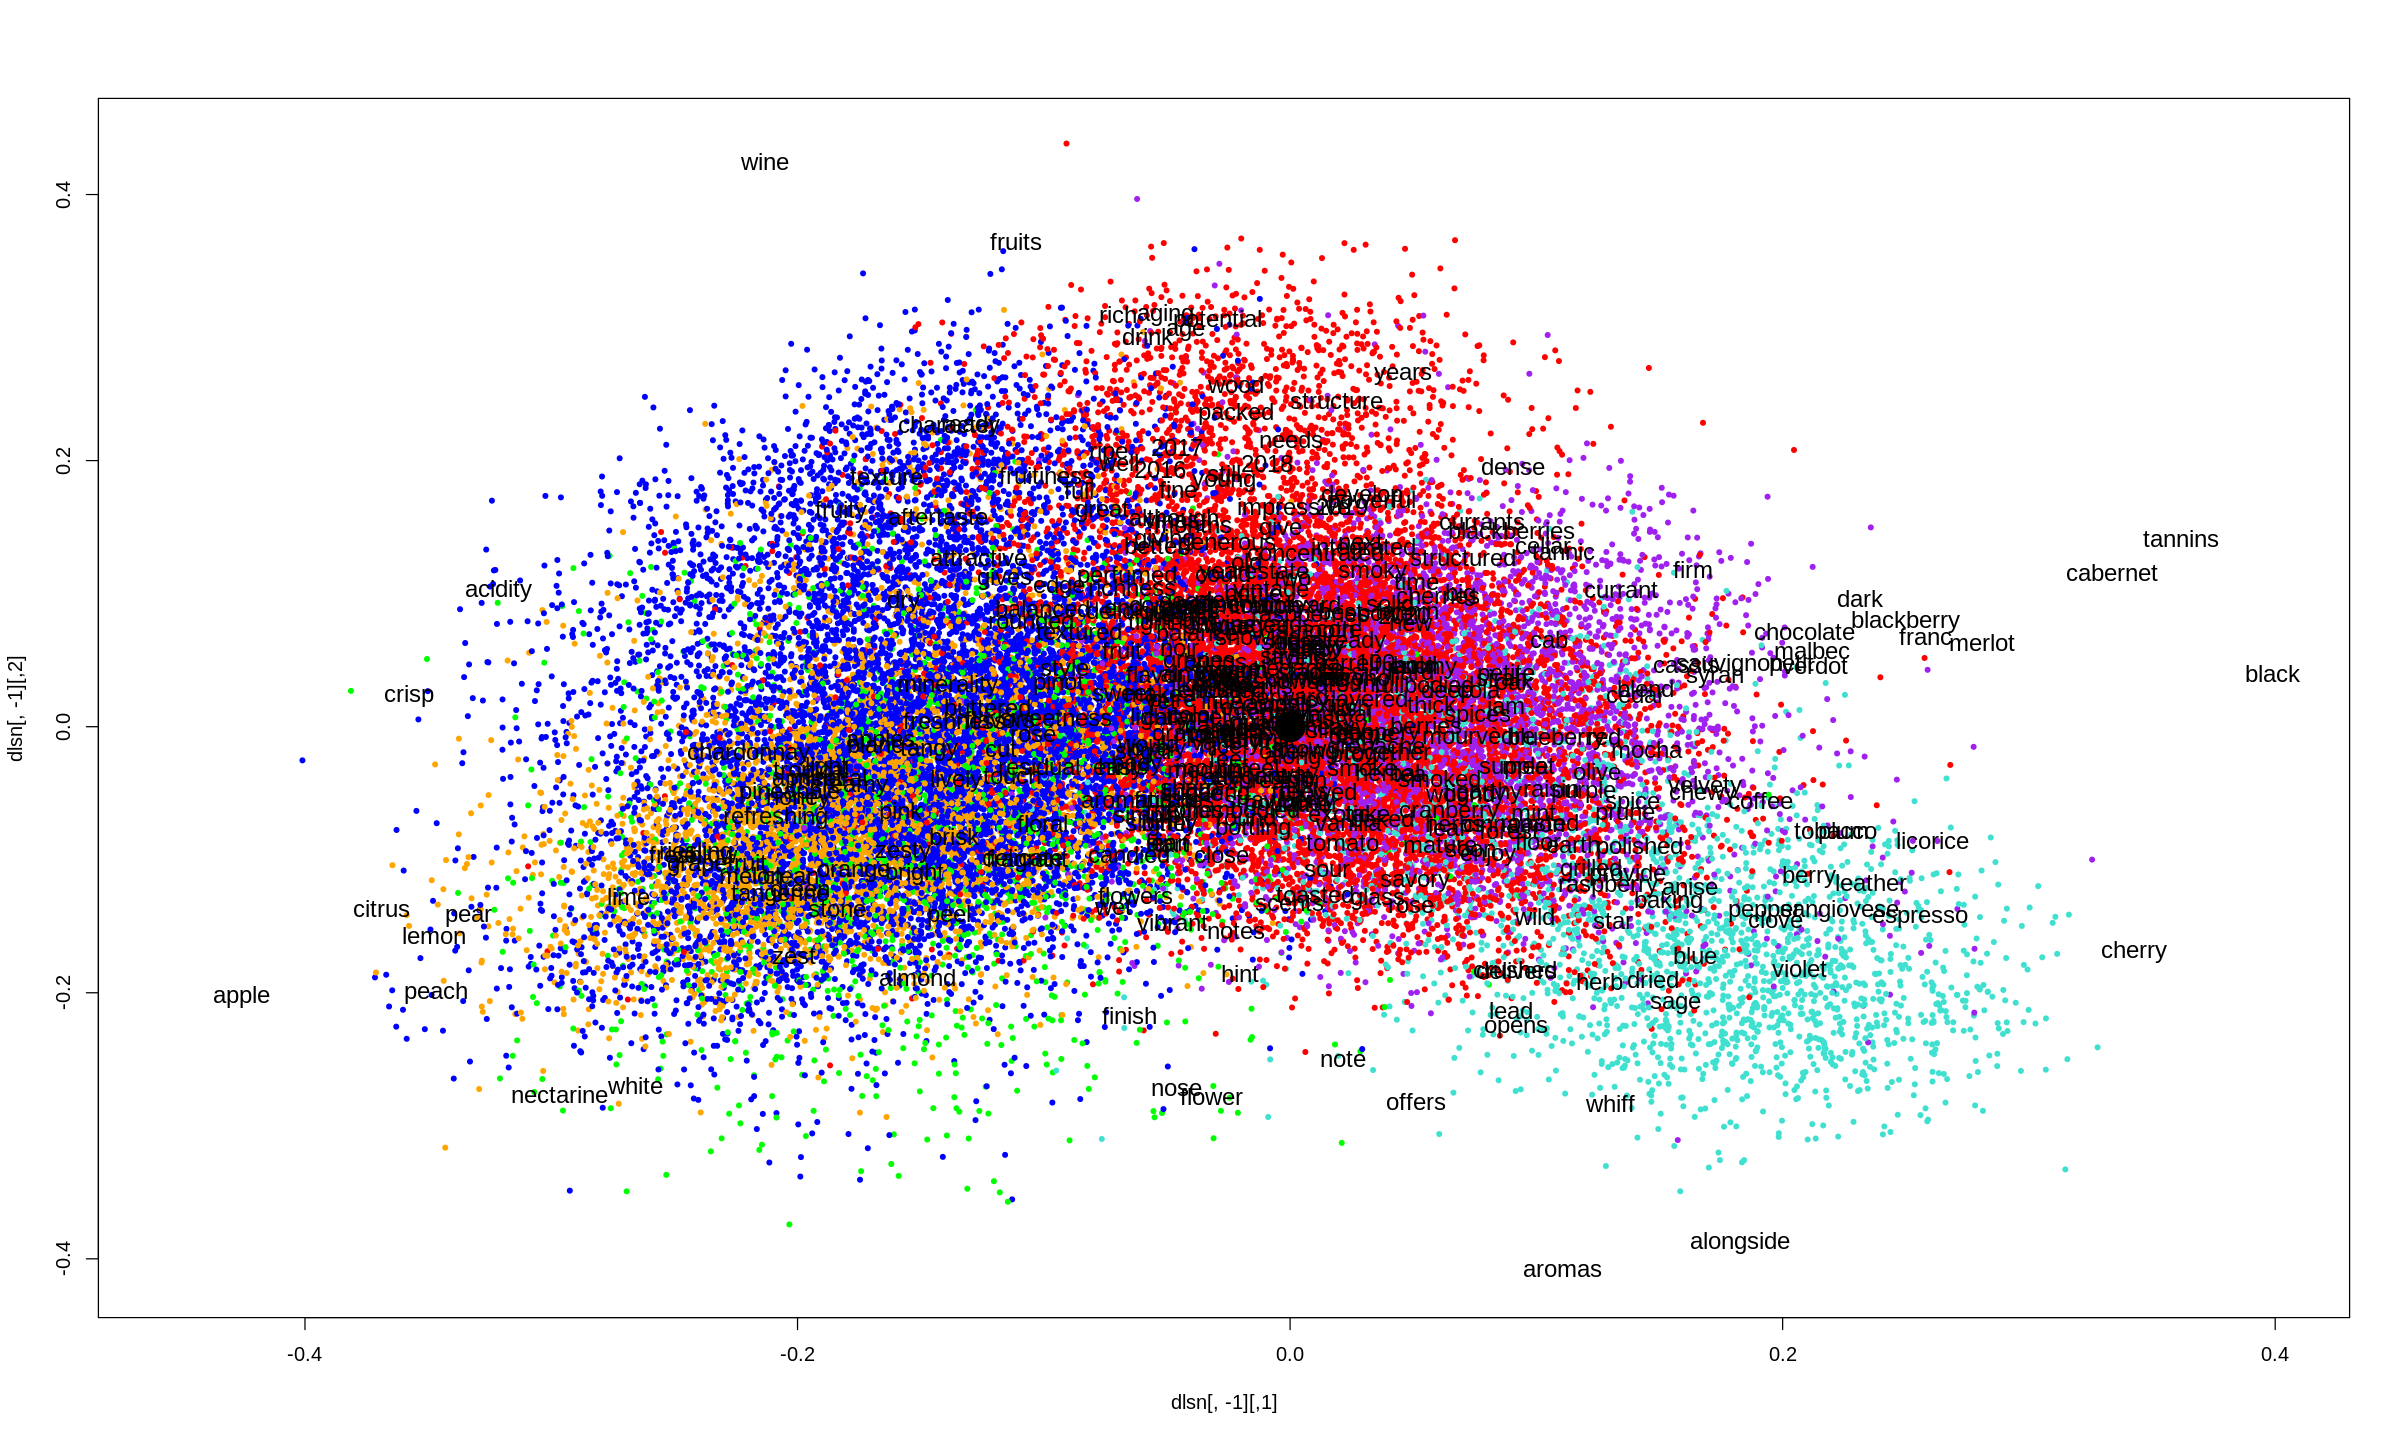

In [54]:
normrows <- function(x) x / apply(x,1,norm,"2")
tlsn_ridotto <- normrows(tls_ridotto)
tlsn <- normrows(tls)
dlsn <- normrows(dls)
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn_ridotto[,-1], labels=words_ridotto, cex=1.2 )
points( 0, 0, pch=20, cex=5 )

In [55]:
sage.vs.Nebbiolo <- table( tdm["sage",]>0, variety=="Nebbiolo")
dimnames(sage.vs.Nebbiolo) <- list(sage = c("No", "Si"), Nebbiolo = c("No", "Si"))
chisqtest = chisq.test( sage.vs.Nebbiolo, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  sage.vs.Nebbiolo
X-squared = 2265.7, df = 1, p-value < 2.2e-16


In [56]:
chisqtest$expected
chisqtest$observed

Nebbiolo
sage No         Si       
  No 115817.056 2567.9444
  Si   1535.944   34.0556

    Nebbiolo
sage     No     Si
  No 116090   2295
  Si   1263    307

In [57]:
neighborSage = names (associate(tls[,2:3], "sage", threshold=0.999))

In [59]:
norma_termini_lsa[neighborSage]

backbone    framed    chunky     dried   accents   refined       raw      soon 
 2.094941  2.993601  3.801138 14.793856  4.949163  2.914776  3.839459  6.715232 
     wild    warmth    mature 
12.393665  1.801843 11.542599

In [60]:
dried.vs.Nebbiolo <- table( tdm["dried",]>0, variety=="Nebbiolo")
dimnames(dried.vs.Nebbiolo) <- list(dried = c("No", "Si"), Nebbiolo = c("No", "Si"))
chisqtest = chisq.test( dried.vs.Nebbiolo, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  dried.vs.Nebbiolo
X-squared = 957.9, df = 1, p-value < 2.2e-16


In [61]:
chisqtest$expected
chisqtest$observed

Nebbiolo
dried No         Si       
   No 110838.443 2457.5565
   Si   6514.557  144.4435

     Nebbiolo
dried     No     Si
   No 111196   2100
   Si   6157    502

In [62]:
driedSage.vs.Nebbiolo <- table( tdm["dried",]>0 & tdm["sage",]>0, variety=="Nebbiolo")
dimnames(driedSage.vs.Nebbiolo) <- list(driedSage = c("No", "Si"), Nebbiolo = c("No", "Si"))
chisqtest = chisq.test( driedSage.vs.Nebbiolo, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  driedSage.vs.Nebbiolo
X-squared = 756, df = 1, p-value < 2.2e-16


In [63]:
chisqtest$expected
chisqtest$observed

Nebbiolo
driedSage No          Si        
       No 116865.8024 2591.19765
       Si    487.1976   10.80235

         Nebbiolo
driedSage     No     Si
       No 116955   2502
       Si    398    100

In [64]:
driedSage.Query <- "dried sage"
driedSage.Vector <- query( driedSage.Query, words )
driedSage.VWeight <- lw_logtf(driedSage.Vector) * ( 1-entropy(tdm) )
driedSage.LSA <- t(driedSage.VWeight) %*% lsar$tk
driedSage.LSA

[,1]        [,2]       [,3]        [,4]        [,5]      [,6]      
DRIED SAGE -0.01853152 0.02056007 -0.02850406 -0.01583683 0.0059978 0.01274559
           [,7]        [,8]        [,9]        [,10]       [,11] [,12]    
DRIED SAGE -0.01325305 -0.02054449 0.009137085 -0.02784716 ⋯     0.0190066
           [,13]       [,14]      [,15]        [,16]      [,17]       [,18]    
DRIED SAGE 0.003005938 0.03181036 -0.005074909 0.01112694 0.004372971 0.0117818
           [,19]       [,20]       [,21]      
DRIED SAGE -0.02066685 0.005710532 0.009595635

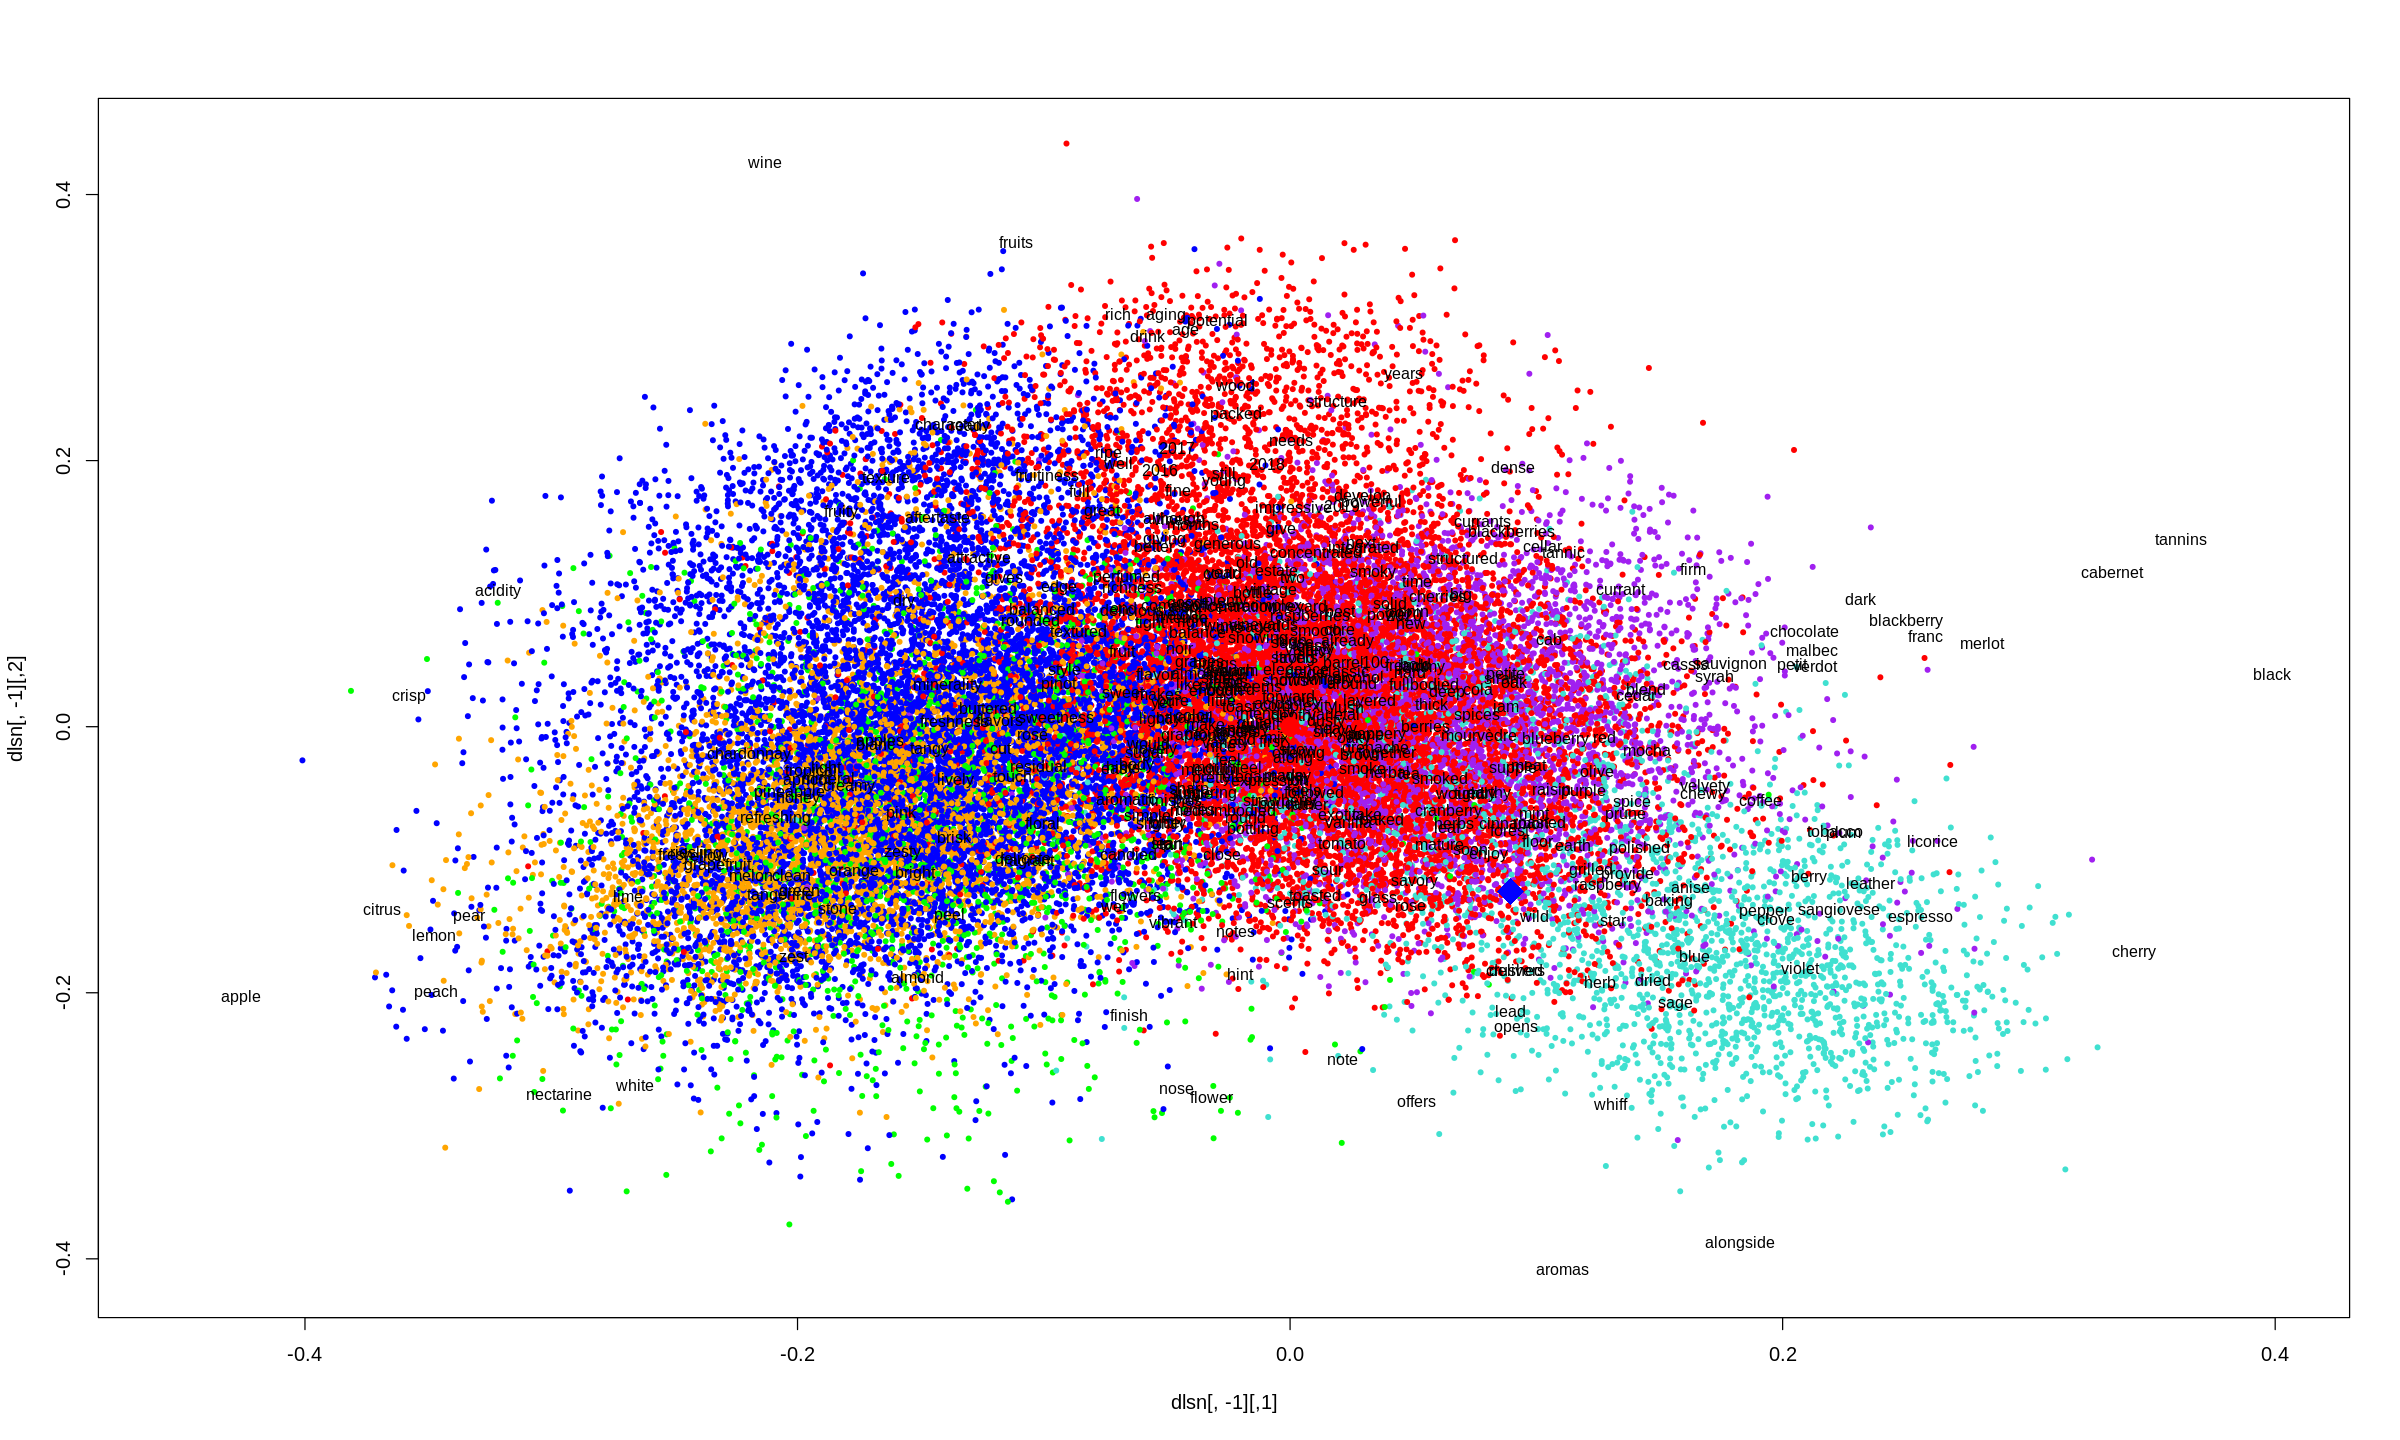

In [67]:
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn_ridotto[,-1], labels=words_ridotto, cex=0.8 )
points( 0, 0, pch=20, cex=3,col="red" ) 
driedSage.LSANorm <- normrows( driedSage.LSA )
points(driedSage.LSANorm[2], driedSage.LSANorm[3],cex=3,pch=18,col="blue")

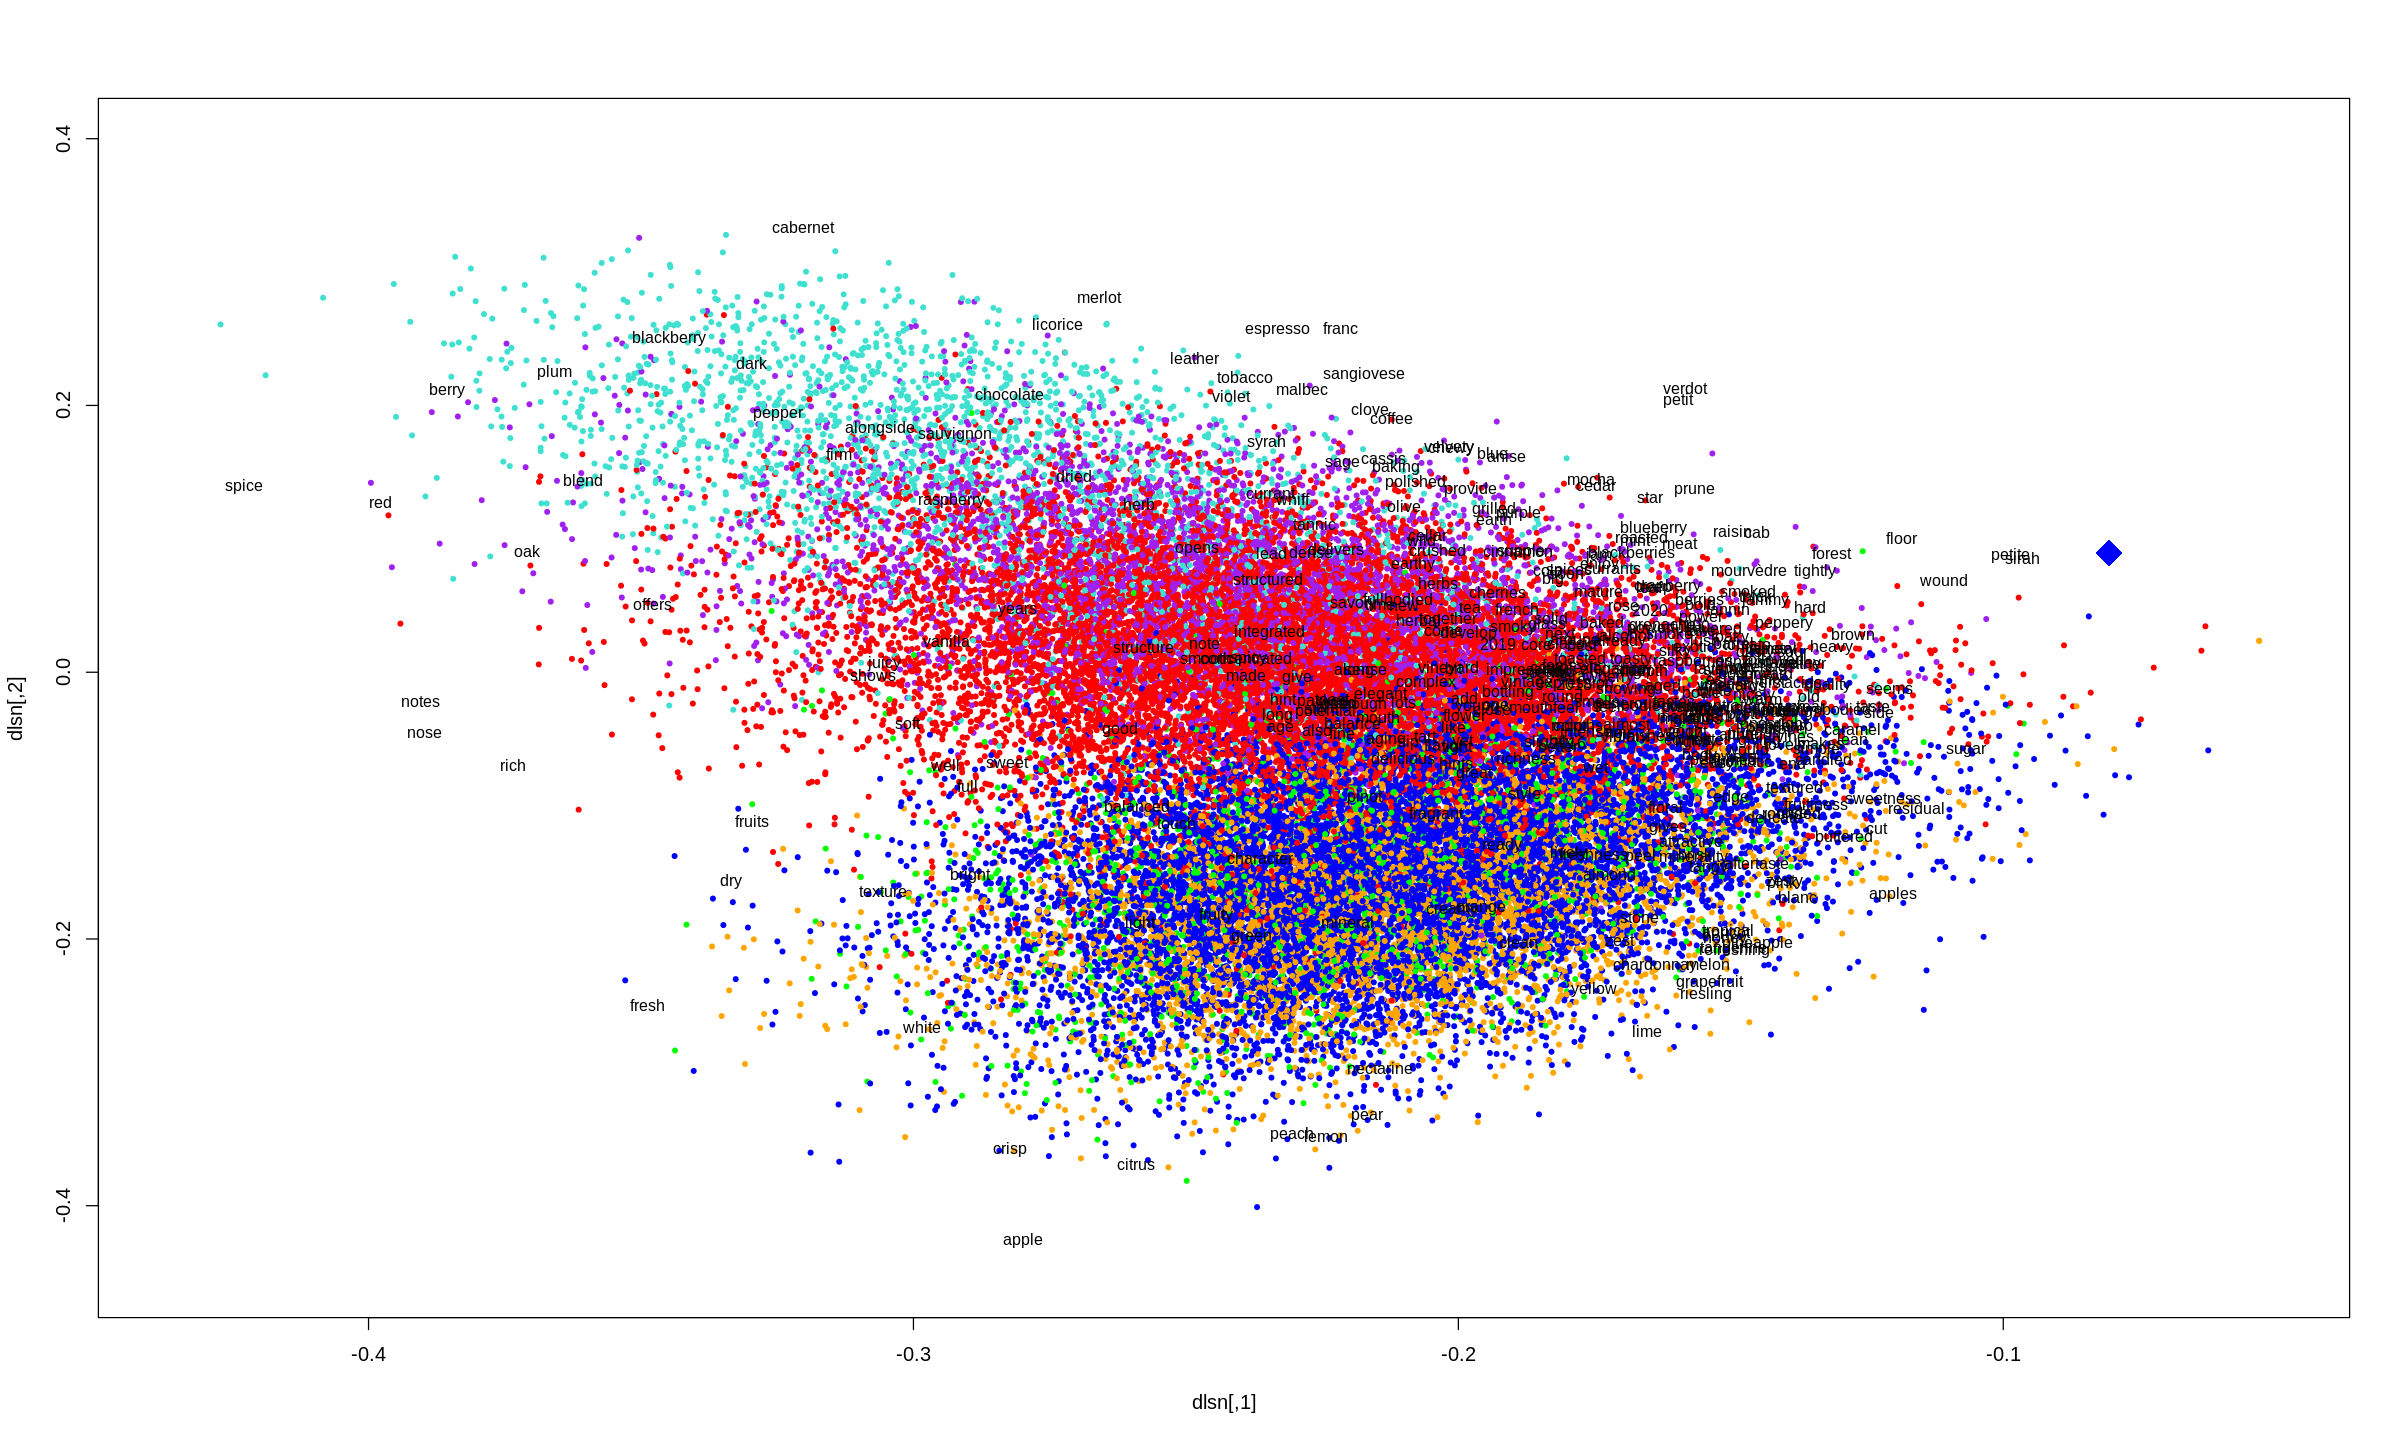

In [68]:
plot( dlsn, pch=20, cex=0.8, col=damcols )
text( tlsn_ridotto, labels=words_ridotto, cex=0.8 )
points( 0, 0, pch=20, cex=3 )
points(driedSage.LSANorm,cex=3,pch=18,col="blue")

In [69]:
cosines <- function(X, Q) apply( X, 1, cosine, as.vector(Q) )
top <- function(X, N) order( X, decreasing=TRUE )[1:N]

In [71]:
top( cosines( dls[,2:3], driedSage.LSA[2:3] ), 10 )
# elenco dei 10 documenti sopra menzionati 
variety[top( cosines( dls[,2:3], driedSage.LSA[2:3] ), 10 )]
reviews[top(cosines(dls[,2:3], driedSage.LSA[2:3]), 10)]

[1] 23634 89800 48769 20752 70420 72984 72790 51672 30293 45917

[1] "Garnacha"                      "Cabernet Sauvignon"           
 [3] "Red Blend"                     "Rhône-style Red Blend"        
 [5] "Mataro"                        "Shiraz"                       
 [7] "Corvina, Rondinella, Molinara" "Cabernet Franc"               
 [9] "Dolcetto"                      "Piedirosso"

[1] "This is dark but somewhat green on the nose, with currant, raspberry, beet and green herb aromas. The palate feels tight to the point of abrasive, with herbal plum flavors. A minty, forceful finish registers as hard and tannic."                                                                           
 [2] "Harsh, rubbery black-fruit aromas include notes of mushroom and horseradish. A shallow palate with hard tannins doesn't offer much space for a soft landing. It tastes largely of hickory on a choppy finish."                                                                                                 
 [3] "This opens with aromas of red berry and black-skinned fruit. On the fresh, easy-drinking palate, savory notes of black pepper accent ripe plum and juicy strawberry. Bright acidity and soft tannins balance the juicy fruit. Enjoy through 2015."                                                             
 [4] "Soft and honey-sweet, this Syrah-based southern Rhône blend offers easy flavors of cherry and raspberry jam, vanilla, white chocolate and pepper."                                                                                                                                                             
 [5] "After recently tasting a knockout bottle of the 2005, this was disappointing. Ample cinnamon and mocha notes accent slightly pruny flavors; the tannins are soft, while the acids provide a lemony edge to the finish."                                                                                        
 [6] "While this isn't easy to identify as Shiraz, it still qualifies as a good, everyday red wine. Rubbery berry aromas come with a pinch of spearmint, while the palate feels juicy and racy. Berry and mild oak flavors finish with a chocolate note and a rubbery accent."                                       
 [7] "This is an oak-influenced Ripasso that opens with sweet aromas of vanilla, dark chocolate and espresso bean. Beyond those tones are more traditional elements of cherry, mesquite, Spanish cedar and cinnamon. Sweet fruit nuances run smoothly over the palate and the wine is clean and lively on the close."
 [8] "Though this wine offers the vibrant cherry fruit and pepper of a good New York Cab Franc, it's a bit one-dimensional. On the nose, candied cherry and spice lead, followed by a slightly tart wave of cherry. Oak adds just a bit of interest. Pair with duck or fowl to soften it."                           
 [9] "This straightforward Dolcetto has red berry and spice aromas and raspberry jam, clove and orange zest flavors. With its flexible tannins, it's ready to be enjoyed soon."                                                                                                                                      
[10] "This is a strange wine (made with Piedirosso from near the ancient city of Pompeii) with a brownish, dull color and awkward aromas of candy cane and cherry pie."

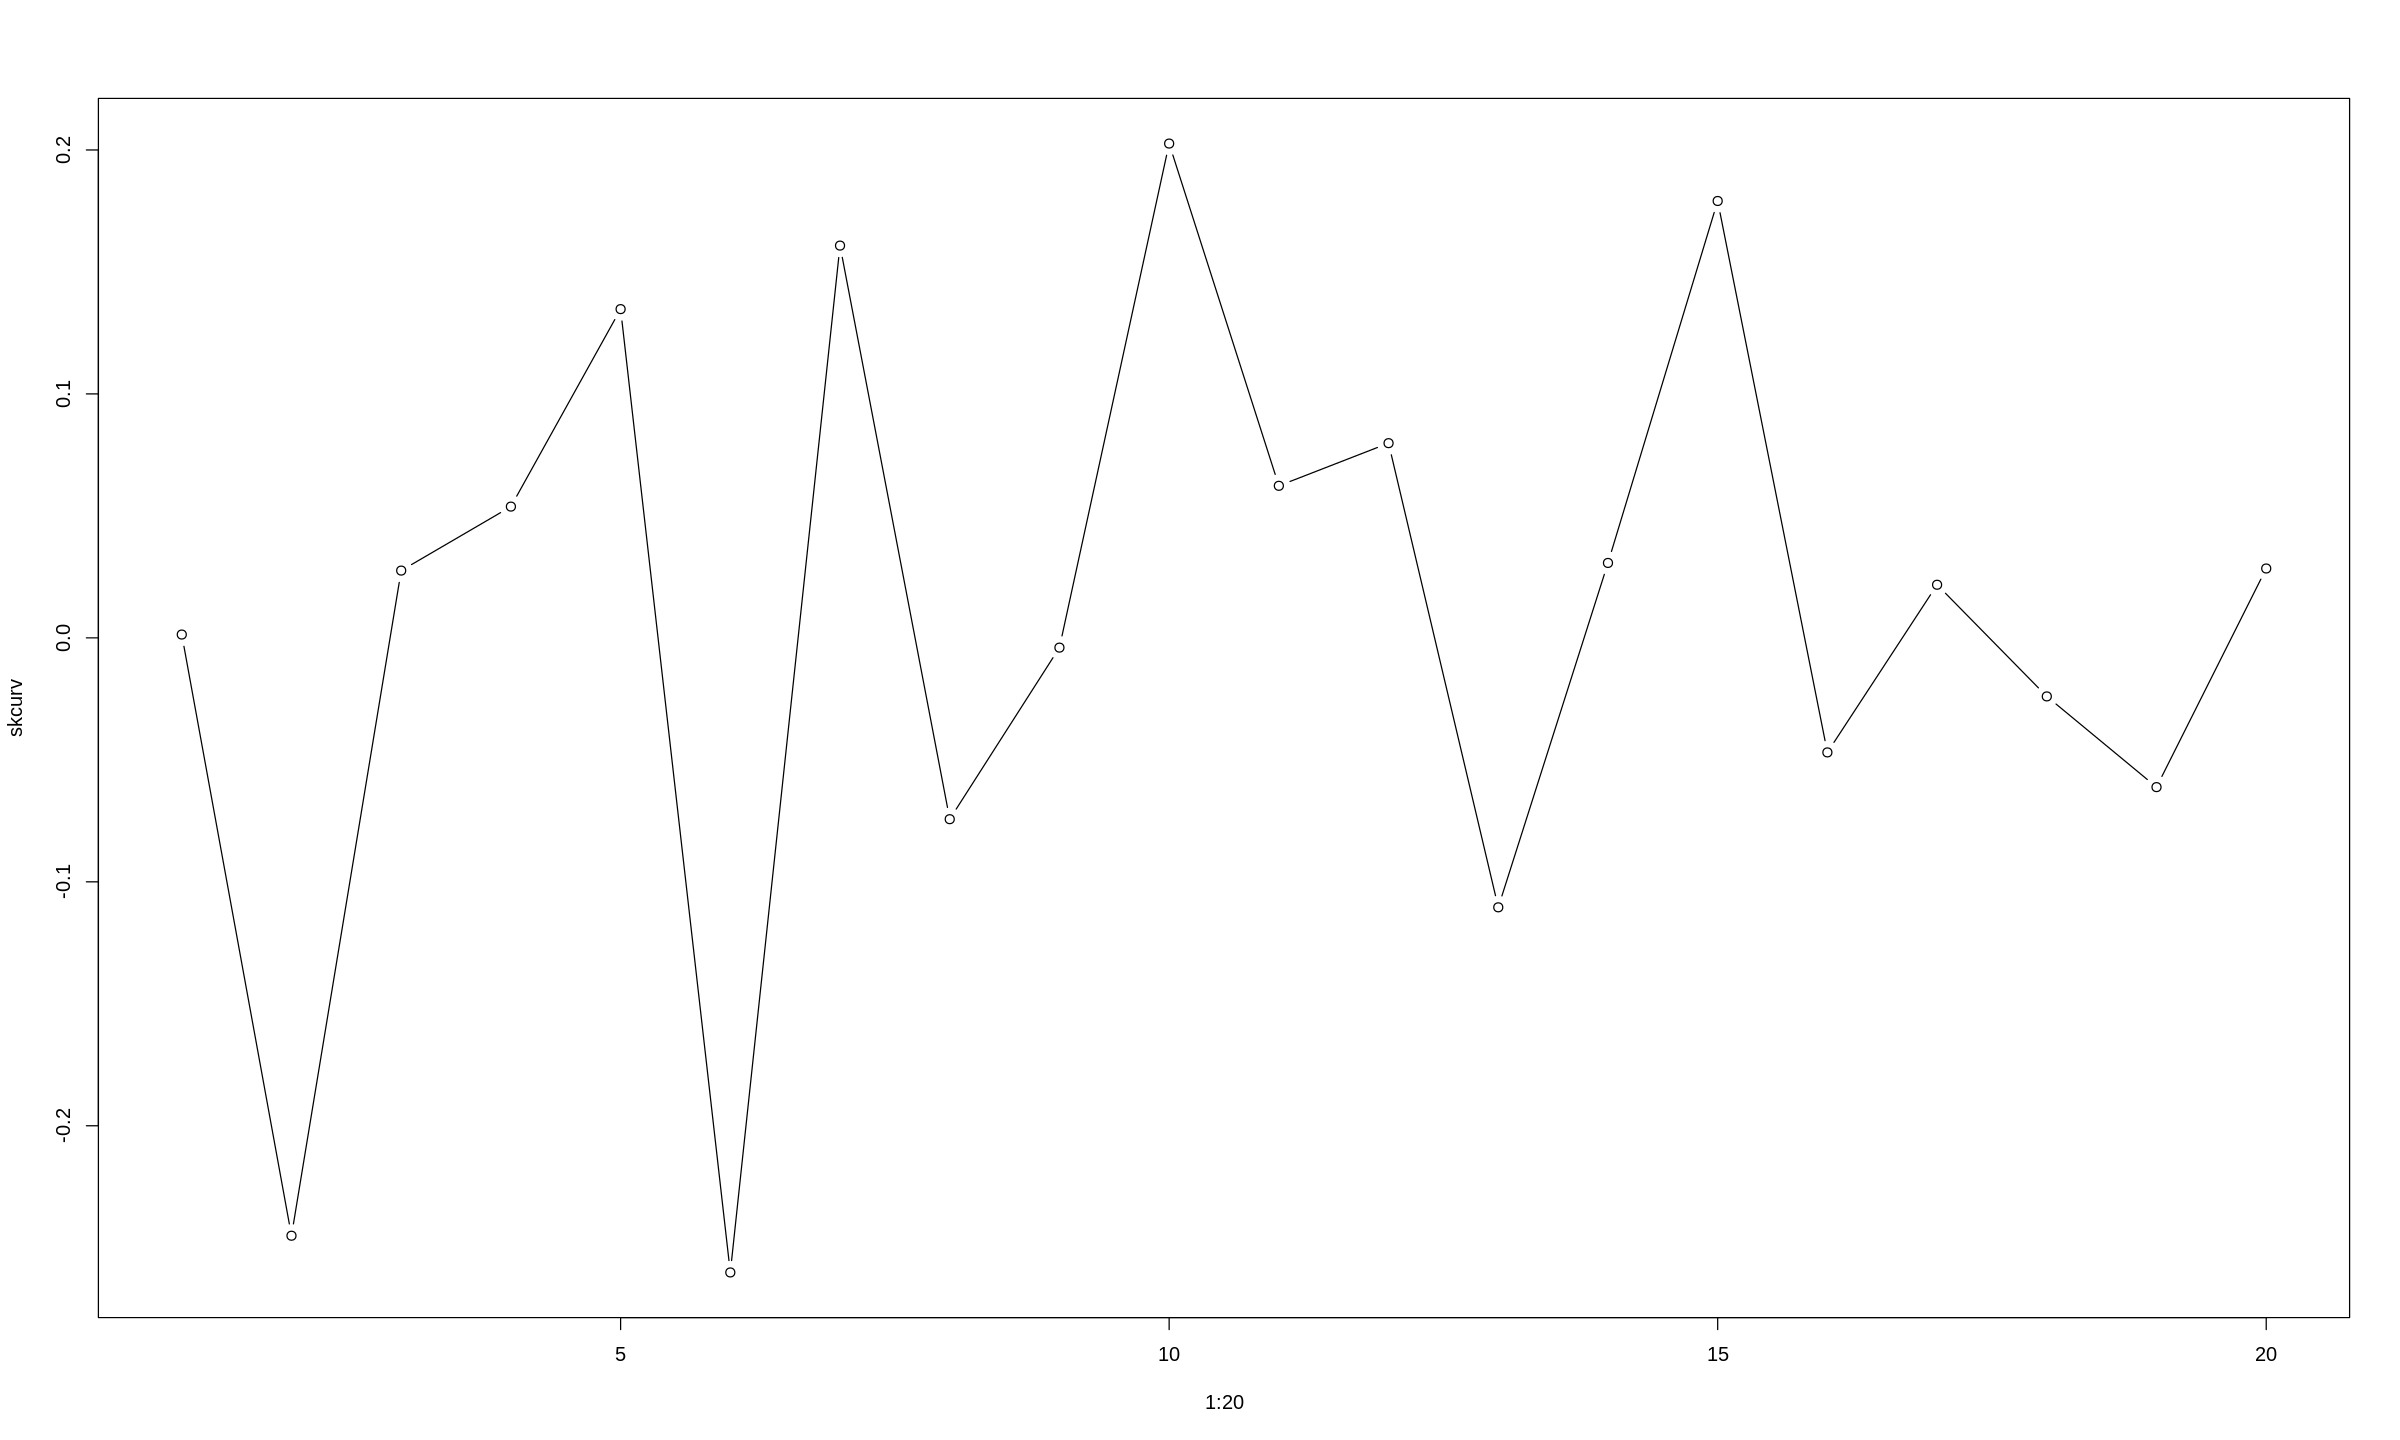

In [72]:
fordiff <- function(x) x[2:length(x)] - x[1:(length(x)-1)]
skd <- fordiff(lsar$sk)
skdd <- fordiff(skd)
skcurv <- skdd[1:20] / (1+(skd[1:20])^2)^1.5
plot( 1:20, skcurv, type="b" )

In [75]:
top( cosines( dls[,1:6], driedSage.LSA[1:6] ), 10 )
variety[top( cosines( dls[,1:6], driedSage.LSA[1:6] ), 30 )]
reviews[top(cosines(dls[,1:6], driedSage.LSA[1:6]), 20)]

[1]  83007  54008 105775  63227  53316 109376 117392  36733 111241  49051

[1] "Pinotage"      "Nebbiolo"      "Nebbiolo"      "Nebbiolo"     
 [5] "Barbera"       "Sangiovese"    "Sangiovese"    "Red Blend"    
 [9] "Nebbiolo"      "Red Blend"     "Nebbiolo"      "Nebbiolo"     
[13] "Nebbiolo"      "Nebbiolo"      "Sangiovese"    "Sangiovese"   
[17] "Montepulciano" "Nebbiolo"      "Sangiovese"    "Red Blend"    
[21] "Nebbiolo"      "Sangiovese"    "Red Blend"     "Nebbiolo"     
[25] "Nebbiolo"      "Red Blend"     "Red Blend"     "Red Blend"    
[29] "Sangiovese"    "Nebbiolo"

[1] "A cocktail of freshly muddled raspberry, red cherry, thyme, anise and dried rose petals sing on the nose. Silky and seductive on the palate, twangs of game and dried Mediterranean herb persist. As an homage to the grape's country-of-origin, enjoy this exotic red alongside traditional South African braai fare."
 [2] "This mountain Nebbiolo opens with aromas of forest floor, violet, menthol and a whiff of scorched earth. The taut palate offers dried black cherry, ground pepper and star anise alongside austere tannins that grip the finish."                                                                                      
 [3] "This opens with blue flower, new leather, crushed mint and underbrush aromas. On the taut, racy palate, white pepper and tobacco notes underscore sour cherry and cranberry fruit alongside austere, fine-grained tannins."                                                                                            
 [4] "This opens with aromas recalling camphor, iris, cherry marinated in spirits and a whiff of coffee. The ripe, uncomplicated palate offers cherry pie, leather, star anise and white pepper alongside velvety tannins."                                                                                                  
 [5] "This has subdued aromas suggesting black-skinned fruit and baking spice. The straightforward palate evokes raspberry jam, clove and a hint of star anise alongside supple tannins. Enjoy soon."                                                                                                                        
 [6] "This hearty red opens with aromas of menthol, spirit-soaked cherry, dried rose and a balsamic note. The robust, one-dimensional palate delivers dried red cherry, stewed fruit, powdered sage and anisette alongside bracing tannins. It's savory and muscular but the heat of evident alcohol throws it off balance." 
 [7] "Aromas of scorched earth, game and a whiff of farmyard lead the nose. The palate offers dried black cherry, leather, anise and sage alongside bracing but fleeting tannins. It finishes abruptly, leaving a rather astringent close."                                                                                  
 [8] "Aromas of underbrush, prune toast and a whiff of crushed blue flower lead the way. The somewhat evolved palate offers dried black cherry, licorice and a hint of espresso alongside dusty tannins."                                                                                                                    
 [9] "This opens with aromas of cranberry, white pepper and a whiff of pipe tobacco. The firm palate offers wild cherry, clove and star anise framed in tightly knit but refined tannins."                                                                                                                                   
[10] "Subtle aromas of dried berry, Mediterranean brush, game and savory herb lead off this vibrant blend of Pinot Nero and Nero d'Avola. The sleek palate offers candied red cherry, cinnamon and thyme alongside fine-grained tannins."                                                                                    
[11] "Aromas of underbrush, cellar floor, porcini mushroom and a whiff of menthol lead the nose. The palate is on the raw side, offering sour cranberry, dried herb and star anise alongside assertive, rather grainy tannins that leave a drying finish."                                                                   
[12] "A whiff of cellar floor, camphor and grilled herb aromas lead the nose while the tightly wound, no-frills palate offers red cherry, pomegranate and white pepper. Assertive, close-grained tannins provide the framework while a hint of grilled sage closes the finish."                                              
[13] "This opens with camphor and coconut aromas and a whiff of exotic spice. The assertive palate shows dried cherry and clove flavors alongside grainy, drying tannins."               